# 기계학습 9조 팀프로젝트


---

* 주제: 공공데이터를 활용한 노인 보호구역 교통사고 위험도 예측 및 개선 방안 제시


* 사용 데이터
    * 2019 서울시 교통사고정보 전처리 데이터: http://taas.koroad.or.kr/web/shp/sbm/initGisAnals.do?menuId=WEB_KMP_GIS_TAS
    * 전국노인장애인보호구역표준데이터: https://www.data.go.kr/data/15034532/standard.do
    * 보행 고령자 사고 CSV: http://taas.koroad.or.kr/api/selectOldmanDataSet.do
    * 서울특별시_전통시장 현황: https://www.data.go.kr/data/15051863/fileData.do
    
    
*  배경
: 보행사고 및 교통사고에 대한 사회적 관심이 증대하면서 스쿨존이 확대되고 있으나 또다른 교통약자인 노인들에 대한 보호는 미비한 실정이다. 특히 고령화 사회를 대비해야 하는 현재 교통에 있어서 노인에 대한 보호가 중요한 상황이다. 노인 밀집지역인 전통시장과 같은 장소 주변에서 고령자의 교통사고 피해 사례를 여럿 접할 수 있었는데 서울시에서는 2021년 전통시장 네 곳을 대상으로 노인보호구역을 설정하겠다고 발표했으나 현재까지 제대로 정책이 이행되지 못했다. 이에 교통약자인 노인을 보호하고 고령화 시대 안전한 사회를 만드는 데 도움이 되게끔 노인 피해 교통사고 데이터를 토대로 노인보호구역의 적합성을 판단하고자 한다.

# 데이터 전처리
---

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 자치구별 교통사고 csv 파일 불러오기

Gangnam = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_강남구.csv',encoding='cp949')
Gangdong = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_강동구.csv',encoding='cp949')
Gangbuk = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_강북구.csv',encoding='cp949')
Gangseo = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_강서구.csv',encoding='cp949')
Gwanak = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_관악구.csv',encoding='cp949')
Guro = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_구로구.csv',encoding='cp949')
Geumcheon = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_금천구.csv',encoding='cp949')
Nowon = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_노원구.csv',encoding='cp949')
Dobong = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_도봉구.csv',encoding='cp949')
Dongdaemun = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_동대문구.csv',encoding='cp949')
Dongjak = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_동작구.csv',encoding='cp949')
Mapo = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_마포구.csv',encoding='cp949')
Seodaemun = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_서대문구.csv',encoding='cp949')
Seocho = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_서초구.csv',encoding='cp949')
Seongdong = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_성동구.csv',encoding='cp949')
Seongbuk = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_성북구.csv',encoding='cp949')
Songpa = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_송파구.csv',encoding='cp949')
Yangcheon = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_양천구.csv',encoding='cp949')
Yeongdeungpo = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_영등포구.csv',encoding='cp949')
Yongsan = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_용산구.csv',encoding='cp949')
Eunpyeong = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_은평구.csv',encoding='cp949')
Jongno = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_종로구.csv',encoding='cp949')
Junggu = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_중구.csv',encoding='cp949')
Jungnang = pd.read_csv('C:/Users/s/Desktop/mlproject/2019_중랑구.csv',encoding='cp949')

In [3]:
# 데이터 이어붙여 traffic_accident 이름의 데이터프레임에 합치기

traffic_accident = pd.concat([Gangnam, Gangdong, Gangbuk, Gangseo, Gwanak, Guro, Geumcheon, Nowon,
                             Dobong, Dongdaemun, Dongjak, Mapo, Seodaemun, Seocho, Seongdong, Seongbuk,
                             Songpa, Yangcheon, Yeongdeungpo, Yongsan, Eunpyeong, Jongno, Junggu, Jungnang])
traffic_accident.head()

,사고번호,사고일시,요일,시군구,도로명,사고내용,사망자수,중상자수,경상자수,부상신고자수,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2.020000e+15,2019년 7월 4일 18시,목요일,서울특별시 강남구 역삼동,강남대로,경상사고,0,0,1,1,...,맑음,단일로 - 기타,건설기계,남,28세,기타불명,승용,남,65세,경상
1,2.020000e+15,2019년 12월 3일 19시,화요일,서울특별시 강남구 역삼동,언주로70길,경상사고,0,0,1,0,...,맑음,교차로 - 교차로횡단보도내,승용,남,50세,상해없음,보행자,여,65세,경상
2,2.020000e+15,2019년 4월 1일 09시,월요일,서울특별시 강남구 개포동,양재대로,중상사고,0,1,0,0,...,맑음,교차로 - 교차로안,승용,여,57세,상해없음,보행자,남,65세,중상
3,2.020000e+15,2019년 5월 22일 08시,수요일,서울특별시 강남구 개포동,논현로16길,경상사고,0,0,2,0,...,맑음,교차로 - 교차로안,승용,여,52세,상해없음,승용,남,65세,경상
4,2.020000e+15,2019년 8월 14일 11시,수요일,서울특별시 강남구 개포동,논현로,경상사고,0,0,1,0,...,맑음,교차로 - 교차로안,승용,남,28세,상해없음,승용,여,65세,경상


In [4]:
# 노인 피해자 데이터 필터링 상태 확인
traffic_accident['피해운전자 연령'].unique()

array(['65세', '66세', '67세', '68세', '69세', '70세', '71세', '72세', '73세',
       '74세', '75세', '76세', '77세', '78세', '79세', '80세', '81세', '82세',
       '84세', '85세', '87세', '90세 이상', '86세', '83세', '88세', '89세'],
      dtype=object)

In [5]:
# 필요한 데이터만 추출
del traffic_accident['사고번호']
del traffic_accident['노면상태']
del traffic_accident['법규위반']
del traffic_accident['사망자수']
del traffic_accident['중상자수']
del traffic_accident['경상자수']
del traffic_accident['부상신고자수']

traffic_accident.head()

,사고일시,요일,시군구,도로명,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2019년 7월 4일 18시,목요일,서울특별시 강남구 역삼동,강남대로,경상사고,차대차 - 측면충돌,맑음,단일로 - 기타,건설기계,남,28세,기타불명,승용,남,65세,경상
1,2019년 12월 3일 19시,화요일,서울특별시 강남구 역삼동,언주로70길,경상사고,차대사람 - 횡단중,맑음,교차로 - 교차로횡단보도내,승용,남,50세,상해없음,보행자,여,65세,경상
2,2019년 4월 1일 09시,월요일,서울특별시 강남구 개포동,양재대로,중상사고,차대사람 - 기타,맑음,교차로 - 교차로안,승용,여,57세,상해없음,보행자,남,65세,중상
3,2019년 5월 22일 08시,수요일,서울특별시 강남구 개포동,논현로16길,경상사고,차대차 - 측면충돌,맑음,교차로 - 교차로안,승용,여,52세,상해없음,승용,남,65세,경상
4,2019년 8월 14일 11시,수요일,서울특별시 강남구 개포동,논현로,경상사고,차대차 - 측면충돌,맑음,교차로 - 교차로안,승용,남,28세,상해없음,승용,여,65세,경상


In [6]:
# '사고일시' -> 년/월/시로 바꾸기
year = []
month = []
day = []
time = []

for i in traffic_accident['사고일시']:
    i = i.split()
    year.append(i[0][:-1])
    month.append(i[1][:-1])
    day.append(i[2][:-1])
    time.append(i[3])

traffic_accident['사고년도'] = year
traffic_accident['사고월'] = month
traffic_accident['사고일'] = day
traffic_accident['사고시간'] = time

del traffic_accident['사고일시']

traffic_accident.head(5)

,요일,시군구,도로명,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사고년도,사고월,사고일,사고시간
0,목요일,서울특별시 강남구 역삼동,강남대로,경상사고,차대차 - 측면충돌,맑음,단일로 - 기타,건설기계,남,28세,기타불명,승용,남,65세,경상,2019,7,4,18시
1,화요일,서울특별시 강남구 역삼동,언주로70길,경상사고,차대사람 - 횡단중,맑음,교차로 - 교차로횡단보도내,승용,남,50세,상해없음,보행자,여,65세,경상,2019,12,3,19시
2,월요일,서울특별시 강남구 개포동,양재대로,중상사고,차대사람 - 기타,맑음,교차로 - 교차로안,승용,여,57세,상해없음,보행자,남,65세,중상,2019,4,1,09시
3,수요일,서울특별시 강남구 개포동,논현로16길,경상사고,차대차 - 측면충돌,맑음,교차로 - 교차로안,승용,여,52세,상해없음,승용,남,65세,경상,2019,5,22,08시
4,수요일,서울특별시 강남구 개포동,논현로,경상사고,차대차 - 측면충돌,맑음,교차로 - 교차로안,승용,남,28세,상해없음,승용,여,65세,경상,2019,8,14,11시


In [7]:
# 요일

d = traffic_accident['요일']

sub1 = []
sub2 = []

for i in d:
    sub2.append(i[0])
traffic_accident['사고요일'] = sub2

for i in d: 
    i=i[0]
    if i=='월':
        sub1.append(0)
    elif i=='화':
        sub1.append(1)
    elif i=='수':
        sub1.append(2)
    elif i=='목':
        sub1.append(3)
    elif i=='금':
        sub1.append(4)
    elif i=='토':
        sub1.append(5)
    else:   # 일
        sub1.append(6)
        
traffic_accident['사고요일_i'] = sub1

del traffic_accident['요일']
traffic_accident.head()

,시군구,도로명,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사고년도,사고월,사고일,사고시간,사고요일,사고요일_i
0,서울특별시 강남구 역삼동,강남대로,경상사고,차대차 - 측면충돌,맑음,단일로 - 기타,건설기계,남,28세,기타불명,승용,남,65세,경상,2019,7,4,18시,목,3
1,서울특별시 강남구 역삼동,언주로70길,경상사고,차대사람 - 횡단중,맑음,교차로 - 교차로횡단보도내,승용,남,50세,상해없음,보행자,여,65세,경상,2019,12,3,19시,화,1
2,서울특별시 강남구 개포동,양재대로,중상사고,차대사람 - 기타,맑음,교차로 - 교차로안,승용,여,57세,상해없음,보행자,남,65세,중상,2019,4,1,09시,월,0
3,서울특별시 강남구 개포동,논현로16길,경상사고,차대차 - 측면충돌,맑음,교차로 - 교차로안,승용,여,52세,상해없음,승용,남,65세,경상,2019,5,22,08시,수,2
4,서울특별시 강남구 개포동,논현로,경상사고,차대차 - 측면충돌,맑음,교차로 - 교차로안,승용,남,28세,상해없음,승용,여,65세,경상,2019,8,14,11시,수,2


In [8]:
traffic_accident['사고장소'] = traffic_accident['시군구']+ ' ' + traffic_accident['도로명']
del traffic_accident['시군구']
del traffic_accident['도로명']

traffic_accident.head()

,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사고년도,사고월,사고일,사고시간,사고요일,사고요일_i,사고장소
0,경상사고,차대차 - 측면충돌,맑음,단일로 - 기타,건설기계,남,28세,기타불명,승용,남,65세,경상,2019,7,4,18시,목,3,서울특별시 강남구 역삼동 강남대로
1,경상사고,차대사람 - 횡단중,맑음,교차로 - 교차로횡단보도내,승용,남,50세,상해없음,보행자,여,65세,경상,2019,12,3,19시,화,1,서울특별시 강남구 역삼동 언주로70길
2,중상사고,차대사람 - 기타,맑음,교차로 - 교차로안,승용,여,57세,상해없음,보행자,남,65세,중상,2019,4,1,09시,월,0,서울특별시 강남구 개포동 양재대로
3,경상사고,차대차 - 측면충돌,맑음,교차로 - 교차로안,승용,여,52세,상해없음,승용,남,65세,경상,2019,5,22,08시,수,2,서울특별시 강남구 개포동 논현로16길
4,경상사고,차대차 - 측면충돌,맑음,교차로 - 교차로안,승용,남,28세,상해없음,승용,여,65세,경상,2019,8,14,11시,수,2,서울특별시 강남구 개포동 논현로


In [9]:
# 사고 내용 -> 부상신고(0), 경상(1), 중상(2), 사망(3)

c1 = traffic_accident['사고내용']

c2 = []
c = []

for i in c1:
    c.append(i[:-2])

traffic_accident['사고내용'] = c

for i in c1:
    if i =='부상신고':
        c2.append(0)
    elif i =='경상':
        c2.append(1)
    elif i == '중상':
        c2.append(2)
    else:   # 사망
        c2.append(3)
        
    #c2.append(i[:-2])

traffic_accident['사고내용_i'] = c2

traffic_accident.head(5)

,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사고년도,사고월,사고일,사고시간,사고요일,사고요일_i,사고장소,사고내용_i
0,경상,차대차 - 측면충돌,맑음,단일로 - 기타,건설기계,남,28세,기타불명,승용,남,65세,경상,2019,7,4,18시,목,3,서울특별시 강남구 역삼동 강남대로,1
1,경상,차대사람 - 횡단중,맑음,교차로 - 교차로횡단보도내,승용,남,50세,상해없음,보행자,여,65세,경상,2019,12,3,19시,화,1,서울특별시 강남구 역삼동 언주로70길,1
2,중상,차대사람 - 기타,맑음,교차로 - 교차로안,승용,여,57세,상해없음,보행자,남,65세,중상,2019,4,1,09시,월,0,서울특별시 강남구 개포동 양재대로,2
3,경상,차대차 - 측면충돌,맑음,교차로 - 교차로안,승용,여,52세,상해없음,승용,남,65세,경상,2019,5,22,08시,수,2,서울특별시 강남구 개포동 논현로16길,1
4,경상,차대차 - 측면충돌,맑음,교차로 - 교차로안,승용,남,28세,상해없음,승용,여,65세,경상,2019,8,14,11시,수,2,서울특별시 강남구 개포동 논현로,1


In [10]:
# 사고유형 -> 차대차(0) / 차대사람만(1)

Type = []
Type2 = []

for i in traffic_accident['사고유형']:
    i=i.split()
    Type.append(i[0])
    if i[0] == '차대차':
        Type2.append(0)
    elif i[0] == '차대사람':
        Type2.append(1)

traffic_accident['사고유형']=Type
traffic_accident['사고유형_i']=Type2

traffic_accident.head(5)

,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,...,피해운전자 상해정도,사고년도,사고월,사고일,사고시간,사고요일,사고요일_i,사고장소,사고내용_i,사고유형_i
0,경상,차대차,맑음,단일로 - 기타,건설기계,남,28세,기타불명,승용,남,...,경상,2019,7,4,18시,목,3,서울특별시 강남구 역삼동 강남대로,1,0
1,경상,차대사람,맑음,교차로 - 교차로횡단보도내,승용,남,50세,상해없음,보행자,여,...,경상,2019,12,3,19시,화,1,서울특별시 강남구 역삼동 언주로70길,1,1
2,중상,차대사람,맑음,교차로 - 교차로안,승용,여,57세,상해없음,보행자,남,...,중상,2019,4,1,09시,월,0,서울특별시 강남구 개포동 양재대로,2,1
3,경상,차대차,맑음,교차로 - 교차로안,승용,여,52세,상해없음,승용,남,...,경상,2019,5,22,08시,수,2,서울특별시 강남구 개포동 논현로16길,1,0
4,경상,차대차,맑음,교차로 - 교차로안,승용,남,28세,상해없음,승용,여,...,경상,2019,8,14,11시,수,2,서울특별시 강남구 개포동 논현로,1,0


In [11]:
# 기상상태 -> 그대로  / 맑음(0), 비(1), 흐림(2), 눈(3), 안개(4)

weather = traffic_accident['기상상태']
w = []

for i in weather:
    if i == '맑음':
        w.append(0)
    elif i == '비':
        w.append(1)
    elif i == '흐림':
        w.append(2)
    elif i == '눈':
        w.append(3)
    else: # 안개
        w.append(4)
        
traffic_accident['기상상태_i'] = w
traffic_accident.head(5)

,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,...,사고년도,사고월,사고일,사고시간,사고요일,사고요일_i,사고장소,사고내용_i,사고유형_i,기상상태_i
0,경상,차대차,맑음,단일로 - 기타,건설기계,남,28세,기타불명,승용,남,...,2019,7,4,18시,목,3,서울특별시 강남구 역삼동 강남대로,1,0,0
1,경상,차대사람,맑음,교차로 - 교차로횡단보도내,승용,남,50세,상해없음,보행자,여,...,2019,12,3,19시,화,1,서울특별시 강남구 역삼동 언주로70길,1,1,0
2,중상,차대사람,맑음,교차로 - 교차로안,승용,여,57세,상해없음,보행자,남,...,2019,4,1,09시,월,0,서울특별시 강남구 개포동 양재대로,2,1,0
3,경상,차대차,맑음,교차로 - 교차로안,승용,여,52세,상해없음,승용,남,...,2019,5,22,08시,수,2,서울특별시 강남구 개포동 논현로16길,1,0,0
4,경상,차대차,맑음,교차로 - 교차로안,승용,남,28세,상해없음,승용,여,...,2019,8,14,11시,수,2,서울특별시 강남구 개포동 논현로,1,0,0


In [12]:
traffic_accident['가해운전자 차종'].unique()

array(['건설기계', '승용', '이륜', '사륜오토바이(ATV)', '개인형이동수단(PM)', '승합', '자전거',
       '화물', '기타불명', '특수', '원동기'], dtype=object)

In [13]:
A_type = traffic_accident['가해운전자 차종'] 

A_type_i = []

# 인덱싱
# 가해운전자 차종
for i in A_type:
    if i == '건설기계':
        A_type_i.append(0)
    elif i == '승용':
        A_type_i.append(1)
    elif i == '이륜':
        A_type_i.append(2)
    elif i == '사륜오토바이(ATV)':
        A_type_i.append(3)
    elif i == '개인형이동수단(PM)':
        A_type_i.append(4)
    elif i == '승합':
        A_type_i.append(5)
    elif i == '자전거':
        A_type_i.append(6)
    elif i == '화물':
        A_type_i.append(7)
    elif i == '특수':
        A_type_i.append(8)
    elif i == '원동기':
        A_type_i.append(9)
    else: # 기타불명
        A_type_i.append(10)
        
traffic_accident['가해운전자 차종_i'] = A_type_i
traffic_accident.head(5)

,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,...,사고월,사고일,사고시간,사고요일,사고요일_i,사고장소,사고내용_i,사고유형_i,기상상태_i,가해운전자 차종_i
0,경상,차대차,맑음,단일로 - 기타,건설기계,남,28세,기타불명,승용,남,...,7,4,18시,목,3,서울특별시 강남구 역삼동 강남대로,1,0,0,0
1,경상,차대사람,맑음,교차로 - 교차로횡단보도내,승용,남,50세,상해없음,보행자,여,...,12,3,19시,화,1,서울특별시 강남구 역삼동 언주로70길,1,1,0,1
2,중상,차대사람,맑음,교차로 - 교차로안,승용,여,57세,상해없음,보행자,남,...,4,1,09시,월,0,서울특별시 강남구 개포동 양재대로,2,1,0,1
3,경상,차대차,맑음,교차로 - 교차로안,승용,여,52세,상해없음,승용,남,...,5,22,08시,수,2,서울특별시 강남구 개포동 논현로16길,1,0,0,1
4,경상,차대차,맑음,교차로 - 교차로안,승용,남,28세,상해없음,승용,여,...,8,14,11시,수,2,서울특별시 강남구 개포동 논현로,1,0,0,1


In [14]:
traffic_accident['피해운전자 차종'].unique()

array(['승용', '보행자', '화물', '이륜', '승합', '자전거', '기타불명', '개인형이동수단(PM)', '원동기',
       '건설기계', '특수'], dtype=object)

In [15]:
V_type = traffic_accident['피해운전자 차종']
V_type_i = []

# 피해운전자 차종 # + 보행자, 사륜오토바이(ATV)
for i in V_type:
    if i == '건설기계':
        V_type_i.append(0)
    elif i == '승용':
        V_type_i.append(1)
    elif i == '이륜':
        V_type_i.append(2)
    elif i == '보행자':
        V_type_i.append(3)
    elif i == '개인형이동수단(PM)':
        V_type_i.append(4)
    elif i == '승합':
        V_type_i.append(5)
    elif i == '자전거':
        V_type_i.append(6)
    elif i == '화물':
        V_type_i.append(7)
    elif i == '특수':
        V_type_i.append(8)
    elif i == '원동기':
        V_type_i.append(9)
    else: # 기타불명
        V_type_i.append(10)
        
traffic_accident['피해운전자 차종_i'] = V_type_i
traffic_accident.head(5)

,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,...,사고일,사고시간,사고요일,사고요일_i,사고장소,사고내용_i,사고유형_i,기상상태_i,가해운전자 차종_i,피해운전자 차종_i
0,경상,차대차,맑음,단일로 - 기타,건설기계,남,28세,기타불명,승용,남,...,4,18시,목,3,서울특별시 강남구 역삼동 강남대로,1,0,0,0,1
1,경상,차대사람,맑음,교차로 - 교차로횡단보도내,승용,남,50세,상해없음,보행자,여,...,3,19시,화,1,서울특별시 강남구 역삼동 언주로70길,1,1,0,1,3
2,중상,차대사람,맑음,교차로 - 교차로안,승용,여,57세,상해없음,보행자,남,...,1,09시,월,0,서울특별시 강남구 개포동 양재대로,2,1,0,1,3
3,경상,차대차,맑음,교차로 - 교차로안,승용,여,52세,상해없음,승용,남,...,22,08시,수,2,서울특별시 강남구 개포동 논현로16길,1,0,0,1,1
4,경상,차대차,맑음,교차로 - 교차로안,승용,남,28세,상해없음,승용,여,...,14,11시,수,2,서울특별시 강남구 개포동 논현로,1,0,0,1,1


In [16]:
traffic_accident['가해운전자 성별'].unique()

array(['남', '여', '기타불명'], dtype=object)

In [17]:
# 가해운전자 성별
A_sex = traffic_accident['가해운전자 성별'] 
A_sex_i = []

for i in A_sex:
    if i == '여':
        A_sex_i.append(1)
    elif i == '기타불명':
        A_sex_i.append(2)
    else: #남성
        A_sex_i.append(0)
traffic_accident['가해운전자 성별_i'] = A_sex_i

# 피해운전자 성별
V_sex = traffic_accident['피해운전자 성별'] 
V_sex_i = []
for i in V_sex:
    if i == '여':
        V_sex_i.append(1)
    elif i == '기타불명':
        V_sex_i.append(2)
    else: #남성
        V_sex_i.append(0)
traffic_accident['피해운전자 성별_i'] = V_sex_i

traffic_accident.head(5)

,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,...,사고요일,사고요일_i,사고장소,사고내용_i,사고유형_i,기상상태_i,가해운전자 차종_i,피해운전자 차종_i,가해운전자 성별_i,피해운전자 성별_i
0,경상,차대차,맑음,단일로 - 기타,건설기계,남,28세,기타불명,승용,남,...,목,3,서울특별시 강남구 역삼동 강남대로,1,0,0,0,1,0,0
1,경상,차대사람,맑음,교차로 - 교차로횡단보도내,승용,남,50세,상해없음,보행자,여,...,화,1,서울특별시 강남구 역삼동 언주로70길,1,1,0,1,3,0,1
2,중상,차대사람,맑음,교차로 - 교차로안,승용,여,57세,상해없음,보행자,남,...,월,0,서울특별시 강남구 개포동 양재대로,2,1,0,1,3,1,0
3,경상,차대차,맑음,교차로 - 교차로안,승용,여,52세,상해없음,승용,남,...,수,2,서울특별시 강남구 개포동 논현로16길,1,0,0,1,1,1,0
4,경상,차대차,맑음,교차로 - 교차로안,승용,남,28세,상해없음,승용,여,...,수,2,서울특별시 강남구 개포동 논현로,1,0,0,1,1,0,1


In [18]:
traffic_accident['가해운전자 연령'] = traffic_accident['가해운전자 연령'].str.replace(pat='세', repl=r'', regex=True)
traffic_accident['가해운전자 연령'] = traffic_accident['가해운전자 연령'].str.replace(pat='미분류', repl=r'', regex=True)
traffic_accident['가해운전자 연령'] = traffic_accident['가해운전자 연령'].str.replace(pat='이상', repl=r'', regex=True)
traffic_accident['가해운전자 연령'] = pd.to_numeric(traffic_accident['가해운전자 연령'])
traffic_accident.head(5)

,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,...,사고요일,사고요일_i,사고장소,사고내용_i,사고유형_i,기상상태_i,가해운전자 차종_i,피해운전자 차종_i,가해운전자 성별_i,피해운전자 성별_i
0,경상,차대차,맑음,단일로 - 기타,건설기계,남,28.0,기타불명,승용,남,...,목,3,서울특별시 강남구 역삼동 강남대로,1,0,0,0,1,0,0
1,경상,차대사람,맑음,교차로 - 교차로횡단보도내,승용,남,50.0,상해없음,보행자,여,...,화,1,서울특별시 강남구 역삼동 언주로70길,1,1,0,1,3,0,1
2,중상,차대사람,맑음,교차로 - 교차로안,승용,여,57.0,상해없음,보행자,남,...,월,0,서울특별시 강남구 개포동 양재대로,2,1,0,1,3,1,0
3,경상,차대차,맑음,교차로 - 교차로안,승용,여,52.0,상해없음,승용,남,...,수,2,서울특별시 강남구 개포동 논현로16길,1,0,0,1,1,1,0
4,경상,차대차,맑음,교차로 - 교차로안,승용,남,28.0,상해없음,승용,여,...,수,2,서울특별시 강남구 개포동 논현로,1,0,0,1,1,0,1


In [19]:
traffic_accident['가해운전자 연령'].unique()

array([28., 50., 57., 52., 63., 24., 49., 78., 73., 53., 30., 47., 55.,
       62., 45., 36., 70., 71., 65., 51., 58., 31., 22., 48., 59., 11.,
       69., 64., 27., 41., 56., 33., 83., 34., 37., 40., 38., nan, 17.,
       61., 35., 66., 39., 68., 29., 25., 46., 67., 74., 54., 23., 42.,
       43., 44., 26., 72., 32., 75., 77., 16., 19., 79., 60., 21., 20.,
       13.,  7., 18., 14., 80., 76., 15., 81., 85., 86., 82., 88., 84.,
       90., 89., 12., 10.,  8.])

In [20]:
traffic_accident['피해운전자 연령'] = traffic_accident['피해운전자 연령'].str.replace(pat='세', repl=r'', regex=True)
traffic_accident['피해운전자 연령'] = traffic_accident['피해운전자 연령'].str.replace(pat='미분류', repl=r'', regex=True)
traffic_accident['피해운전자 연령'] = traffic_accident['피해운전자 연령'].str.replace(pat='이상', repl=r'', regex=True)
traffic_accident['피해운전자 연령'] = pd.to_numeric(traffic_accident['피해운전자 연령'])
traffic_accident.head(5)

,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,...,사고요일,사고요일_i,사고장소,사고내용_i,사고유형_i,기상상태_i,가해운전자 차종_i,피해운전자 차종_i,가해운전자 성별_i,피해운전자 성별_i
0,경상,차대차,맑음,단일로 - 기타,건설기계,남,28.0,기타불명,승용,남,...,목,3,서울특별시 강남구 역삼동 강남대로,1,0,0,0,1,0,0
1,경상,차대사람,맑음,교차로 - 교차로횡단보도내,승용,남,50.0,상해없음,보행자,여,...,화,1,서울특별시 강남구 역삼동 언주로70길,1,1,0,1,3,0,1
2,중상,차대사람,맑음,교차로 - 교차로안,승용,여,57.0,상해없음,보행자,남,...,월,0,서울특별시 강남구 개포동 양재대로,2,1,0,1,3,1,0
3,경상,차대차,맑음,교차로 - 교차로안,승용,여,52.0,상해없음,승용,남,...,수,2,서울특별시 강남구 개포동 논현로16길,1,0,0,1,1,1,0
4,경상,차대차,맑음,교차로 - 교차로안,승용,남,28.0,상해없음,승용,여,...,수,2,서울특별시 강남구 개포동 논현로,1,0,0,1,1,0,1


In [21]:
traffic_accident['피해운전자 연령'].unique()

array([65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 84, 85, 87, 90, 86, 83, 88, 89], dtype=int64)

In [22]:
a=traffic_accident['가해운전자 연령']

a_1=[]

for i in a:
    if i < 10:
        i = 0
    if i < 20:
        i = 10
    elif i < 30:
        i = 20
    elif i < 40:
        i = 30
    elif i < 50:
        i = 40
    elif i < 60:
        i = 50
    elif i < 70:
        i = 60
    elif i < 80:
        i = 70
    elif i < 90:
        i = 80
    elif i < 100:
        i = 90
    else:
        i = 50 # 기존 미분류 상태. 0~100의 평균 값인 50으로 대체
    a_1.append(i)

traffic_accident['가해운전자 연령대'] = a_1
traffic_accident.head(5)

,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,...,사고요일_i,사고장소,사고내용_i,사고유형_i,기상상태_i,가해운전자 차종_i,피해운전자 차종_i,가해운전자 성별_i,피해운전자 성별_i,가해운전자 연령대
0,경상,차대차,맑음,단일로 - 기타,건설기계,남,28.0,기타불명,승용,남,...,3,서울특별시 강남구 역삼동 강남대로,1,0,0,0,1,0,0,20
1,경상,차대사람,맑음,교차로 - 교차로횡단보도내,승용,남,50.0,상해없음,보행자,여,...,1,서울특별시 강남구 역삼동 언주로70길,1,1,0,1,3,0,1,50
2,중상,차대사람,맑음,교차로 - 교차로안,승용,여,57.0,상해없음,보행자,남,...,0,서울특별시 강남구 개포동 양재대로,2,1,0,1,3,1,0,50
3,경상,차대차,맑음,교차로 - 교차로안,승용,여,52.0,상해없음,승용,남,...,2,서울특별시 강남구 개포동 논현로16길,1,0,0,1,1,1,0,50
4,경상,차대차,맑음,교차로 - 교차로안,승용,남,28.0,상해없음,승용,여,...,2,서울특별시 강남구 개포동 논현로,1,0,0,1,1,0,1,20


In [23]:
b=traffic_accident['피해운전자 연령']

b_1=[]

for i in b:
    if i<70:
        i=60
    elif i<80:
        i=70
    elif i<90:
        i=80
    else: #90세 이상
        i=90
    b_1.append(i)

traffic_accident['피해운전자 연령대'] = b_1
traffic_accident.head(5)

,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,...,사고장소,사고내용_i,사고유형_i,기상상태_i,가해운전자 차종_i,피해운전자 차종_i,가해운전자 성별_i,피해운전자 성별_i,가해운전자 연령대,피해운전자 연령대
0,경상,차대차,맑음,단일로 - 기타,건설기계,남,28.0,기타불명,승용,남,...,서울특별시 강남구 역삼동 강남대로,1,0,0,0,1,0,0,20,60
1,경상,차대사람,맑음,교차로 - 교차로횡단보도내,승용,남,50.0,상해없음,보행자,여,...,서울특별시 강남구 역삼동 언주로70길,1,1,0,1,3,0,1,50,60
2,중상,차대사람,맑음,교차로 - 교차로안,승용,여,57.0,상해없음,보행자,남,...,서울특별시 강남구 개포동 양재대로,2,1,0,1,3,1,0,50,60
3,경상,차대차,맑음,교차로 - 교차로안,승용,여,52.0,상해없음,승용,남,...,서울특별시 강남구 개포동 논현로16길,1,0,0,1,1,1,0,50,60
4,경상,차대차,맑음,교차로 - 교차로안,승용,남,28.0,상해없음,승용,여,...,서울특별시 강남구 개포동 논현로,1,0,0,1,1,0,1,20,60


In [24]:
del traffic_accident['피해운전자 연령']
del traffic_accident['가해운전자 연령']
traffic_accident.head(5)

,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 상해정도,...,사고장소,사고내용_i,사고유형_i,기상상태_i,가해운전자 차종_i,피해운전자 차종_i,가해운전자 성별_i,피해운전자 성별_i,가해운전자 연령대,피해운전자 연령대
0,경상,차대차,맑음,단일로 - 기타,건설기계,남,기타불명,승용,남,경상,...,서울특별시 강남구 역삼동 강남대로,1,0,0,0,1,0,0,20,60
1,경상,차대사람,맑음,교차로 - 교차로횡단보도내,승용,남,상해없음,보행자,여,경상,...,서울특별시 강남구 역삼동 언주로70길,1,1,0,1,3,0,1,50,60
2,중상,차대사람,맑음,교차로 - 교차로안,승용,여,상해없음,보행자,남,중상,...,서울특별시 강남구 개포동 양재대로,2,1,0,1,3,1,0,50,60
3,경상,차대차,맑음,교차로 - 교차로안,승용,여,상해없음,승용,남,경상,...,서울특별시 강남구 개포동 논현로16길,1,0,0,1,1,1,0,50,60
4,경상,차대차,맑음,교차로 - 교차로안,승용,남,상해없음,승용,여,경상,...,서울특별시 강남구 개포동 논현로,1,0,0,1,1,0,1,20,60


In [25]:
traffic_accident['사고시간'] = traffic_accident['사고시간'].str.replace(pat='시', repl=r'', regex=True)
traffic_accident['사고시간'] = pd.to_numeric(traffic_accident['사고시간'])

In [26]:
traffic_accident['사고시간']

0      18
1      19
2       9
3       8
4      11
       ..
200     8
201    16
202    21
203    20
204     8
Name: 사고시간, Length: 4050, dtype: int64

In [27]:
# Time에서 3시간단위로 구분

'''
00~03 : 0
03-06 : 1
06-09 : 2
09-12 : 3
12-15 : 4
15-18 : 5
18-21 : 6
21-00 : 7
'''

t = traffic_accident['사고시간']
sub=[]

for i in t:
    if 0<=i<3:
        i=0
    elif 3<=i<6:
        i=1
    elif 6<=i<9:
        i=2
    elif 9<=i<12:
        i=3
    elif 12<=i<15:
        i=4
    elif 15<=i<18:
        i=5
    elif 18<=i<21:
        i=6
    elif 21<=i<24:
        i=7
    else:
        i = 3
    sub.append(i)

traffic_accident['사고시간_인덱싱']=sub
traffic_accident.head(10)

,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 상해정도,...,사고내용_i,사고유형_i,기상상태_i,가해운전자 차종_i,피해운전자 차종_i,가해운전자 성별_i,피해운전자 성별_i,가해운전자 연령대,피해운전자 연령대,사고시간_인덱싱
0,경상,차대차,맑음,단일로 - 기타,건설기계,남,기타불명,승용,남,경상,...,1,0,0,0,1,0,0,20,60,6
1,경상,차대사람,맑음,교차로 - 교차로횡단보도내,승용,남,상해없음,보행자,여,경상,...,1,1,0,1,3,0,1,50,60,6
2,중상,차대사람,맑음,교차로 - 교차로안,승용,여,상해없음,보행자,남,중상,...,2,1,0,1,3,1,0,50,60,3
3,경상,차대차,맑음,교차로 - 교차로안,승용,여,상해없음,승용,남,경상,...,1,0,0,1,1,1,0,50,60,2
4,경상,차대차,맑음,교차로 - 교차로안,승용,남,상해없음,승용,여,경상,...,1,0,0,1,1,0,1,20,60,3
5,중상,차대차,맑음,교차로 - 교차로부근,승용,남,상해없음,승용,남,중상,...,2,0,0,1,1,0,0,60,60,1
6,중상,차대차,맑음,교차로 - 교차로안,승용,여,상해없음,화물,남,중상,...,2,0,0,1,7,1,0,20,60,7
7,경상,차대차,맑음,교차로 - 교차로안,이륜,남,상해없음,승용,여,경상,...,1,0,0,2,1,0,1,20,60,4
8,중상,차대사람,맑음,교차로 - 교차로안,승용,남,상해없음,보행자,남,중상,...,2,1,0,1,3,0,0,40,60,1
9,경상,차대차,맑음,단일로 - 기타,승용,남,상해없음,승용,남,경상,...,1,0,0,1,1,0,0,70,60,7


In [28]:
# 컬럼순서 조정

traffic_accident_copy = traffic_accident[['사고년도','사고월','사고일','사고시간','사고시간_인덱싱',
                                     '사고요일','사고장소','사고내용','사고유형','기상상태',
                                     '가해운전자 차종','가해운전자 성별','가해운전자 연령대',
                                     '피해운전자 차종','피해운전자 성별','피해운전자 연령대']]

traffic_accident_copy.head(10)

traffic_accident_copy.to_csv('C:/Users/s/Desktop/mlproject/traffic_accident_copy.csv')

In [29]:
traffic_accident['도로형태'].unique()

array(['단일로 - 기타', '교차로 - 교차로횡단보도내', '교차로 - 교차로안', '교차로 - 교차로부근',
       '기타 - 기타', '단일로 - 교량', '단일로 - 고가도로위', '단일로 - 터널', '주차장 - 주차장',
       '단일로 - 지하차도(도로)내'], dtype=object)

In [30]:
# 도로형태 : 구분을 교차로 (0), 단일로(1)로만 구분하되, 기타 - 기타 는 단일로의 비율대로 랜덤하게 배정

import random

# 교차로, 단일로, 기타로 나눔
road = traffic_accident['도로형태']
road_t=[]

for i in road:
    i=i.split()
    if i[0]=='교차로':
        road_t.append(0)
    elif i[0]=='단일로':
        road_t.append(1)
    else:
        road_t.append(2)

print(road_t.count(0))   # 교차로 - 14744
print(road_t.count(1))   # 단일로 - 16431개
print(road_t.count(2))     # 기타 - 1660개

1952
1889
209


In [31]:
# 교차로, 단일로 개수만큼의 박스를 생성
t1 = [0] * road_t.count(0)
t2 = [1] * road_t.count(1)
sub1 = t1 + t2
random.shuffle(sub1)

In [32]:
# 기타 -> 교차로, 단일로 비율의 랜덤으로 뿌림
sub2=[]
for i in range(len(road_t)):
    if road_t[i] == 2:
        road_t[i] = random.choice(sub1)

traffic_accident['도로형태'] = road_t
traffic_accident.head()

,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 상해정도,...,사고내용_i,사고유형_i,기상상태_i,가해운전자 차종_i,피해운전자 차종_i,가해운전자 성별_i,피해운전자 성별_i,가해운전자 연령대,피해운전자 연령대,사고시간_인덱싱
0,경상,차대차,맑음,1,건설기계,남,기타불명,승용,남,경상,...,1,0,0,0,1,0,0,20,60,6
1,경상,차대사람,맑음,0,승용,남,상해없음,보행자,여,경상,...,1,1,0,1,3,0,1,50,60,6
2,중상,차대사람,맑음,0,승용,여,상해없음,보행자,남,중상,...,2,1,0,1,3,1,0,50,60,3
3,경상,차대차,맑음,0,승용,여,상해없음,승용,남,경상,...,1,0,0,1,1,1,0,50,60,2
4,경상,차대차,맑음,0,승용,남,상해없음,승용,여,경상,...,1,0,0,1,1,0,1,20,60,3


In [33]:
traffic_accident_copy_ver2 = traffic_accident[['사고요일_i','사고내용_i','사고시간_인덱싱','도로형태']]
traffic_accident_copy_ver2.head()

,사고요일_i,사고내용_i,사고시간_인덱싱,도로형태
0,3,1,6,1
1,1,1,6,0
2,0,2,3,0
3,2,1,2,0
4,2,1,3,0


In [34]:
traffic_accident_copy_ver2.to_csv('C:/Users/s/Desktop/mlproject/model2_test.csv',encoding='utf-8-sig')

In [35]:
data = pd.read_csv('C:/Users/s/Desktop/mlproject/model2_test.csv')
data

,Unnamed: 0,사고요일_i,사고내용_i,사고시간_인덱싱,도로형태
0,0,3,1,6,1
1,1,1,1,6,0
2,2,0,2,3,0
3,3,2,1,2,0
4,4,2,1,3,0
...,...,...,...,...,...
4045,200,0,0,2,0
4046,201,1,2,5,1
4047,202,2,1,7,0
4048,203,4,1,6,0


In [36]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np

In [37]:
X=data.iloc[:,range(0,data.shape[1]-1)]
X
y=data.iloc[:,data.shape[1]-1]
y

0       1
1       0
2       0
3       0
4       0
       ..
4045    0
4046    1
4047    0
4048    0
4049    1
Name: 도로형태, Length: 4050, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_train, df_test = train_test_split(data, test_size=0.35,stratify=y, random_state=100)
df_train.shape, df_test.shape

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# 스케일 조정
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [39]:
# 사고 장소 location 데이터셋으로 분리 및 Geocoder-Xr 툴을 통해 경도와 위도 값 추출

location = pd.read_csv('C:/Users/s/Desktop/mlproject/location.csv', encoding='cp949')
location.head()

,location,Unnamed: 1,Unnamed: 2,Unnamed: 3,경도,위도
0,서울특별시 강남구 역삼동 강남대로,NaN,NaN,NaN,127.013484,37.526732
1,서울특별시 강남구 역삼동 언주로70길,NaN,NaN,NaN,127.047425,37.496757
2,서울특별시 강남구 개포동 양재대로,NaN,NaN,NaN,127.051930,37.471519
3,서울특별시 강남구 개포동 논현로16길,NaN,NaN,NaN,127.047344,37.475634
4,서울특별시 강남구 개포동 논현로,NaN,NaN,NaN,127.035459,37.502917


In [40]:
del location['Unnamed: 1']
del location['Unnamed: 2']
del location['Unnamed: 3']

In [41]:
location.columns = ['사고장소', '경도', '위도']
location.head()

,사고장소,경도,위도
0,서울특별시 강남구 역삼동 강남대로,127.013484,37.526732
1,서울특별시 강남구 역삼동 언주로70길,127.047425,37.496757
2,서울특별시 강남구 개포동 양재대로,127.051930,37.471519
3,서울특별시 강남구 개포동 논현로16길,127.047344,37.475634
4,서울특별시 강남구 개포동 논현로,127.035459,37.502917


In [42]:
traffic_accident = pd.merge(traffic_accident, location, on = '사고장소')
traffic_accident.head()

,사고내용,사고유형,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 상해정도,...,기상상태_i,가해운전자 차종_i,피해운전자 차종_i,가해운전자 성별_i,피해운전자 성별_i,가해운전자 연령대,피해운전자 연령대,사고시간_인덱싱,경도,위도
0,경상,차대차,맑음,1,건설기계,남,기타불명,승용,남,경상,...,0,0,1,0,0,20,60,6,127.013484,37.526732
1,중상,차대차,맑음,1,승용,여,기타불명,승합,남,중상,...,0,1,5,1,0,60,60,3,127.013484,37.526732
2,경상,차대차,맑음,1,승용,남,경상,승합,남,상해없음,...,0,1,5,0,0,30,60,6,127.013484,37.526732
3,경상,차대차,비,1,승용,남,상해없음,승용,여,경상,...,1,1,1,0,1,30,60,1,127.013484,37.526732
4,경상,차대차,맑음,1,승용,남,상해없음,승용,남,경상,...,0,1,1,0,0,30,60,5,127.013484,37.526732


In [43]:
traffic_accident.columns

Index(['사고내용', '사고유형', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 상해정도', '사고년도', '사고월', '사고일', '사고시간',
       '사고요일', '사고요일_i', '사고장소', '사고내용_i', '사고유형_i', '기상상태_i', '가해운전자 차종_i',
       '피해운전자 차종_i', '가해운전자 성별_i', '피해운전자 성별_i', '가해운전자 연령대', '피해운전자 연령대',
       '사고시간_인덱싱', '경도', '위도'],
      dtype='object')

In [44]:
df = traffic_accident[['사고월', '사고일', '사고시간', '사고시간_인덱싱', '사고요일', '사고요일_i', '사고장소', '위도', '경도',
                       '사고내용', '사고내용_i', '사고유형', '사고유형_i', '기상상태', '기상상태_i', '도로형태',
                       '가해운전자 차종', '가해운전자 차종_i', '가해운전자 성별', '가해운전자 성별_i', '가해운전자 연령대',
                       '피해운전자 차종', '피해운전자 차종_i', '피해운전자 성별', '피해운전자 성별_i', '피해운전자 연령대']]
df.columns

Index(['사고월', '사고일', '사고시간', '사고시간_인덱싱', '사고요일', '사고요일_i', '사고장소', '위도', '경도',
       '사고내용', '사고내용_i', '사고유형', '사고유형_i', '기상상태', '기상상태_i', '도로형태',
       '가해운전자 차종', '가해운전자 차종_i', '가해운전자 성별', '가해운전자 성별_i', '가해운전자 연령대',
       '피해운전자 차종', '피해운전자 차종_i', '피해운전자 성별', '피해운전자 성별_i', '피해운전자 연령대'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4050 entries, 0 to 4049
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사고월         4050 non-null   object 
 1   사고일         4050 non-null   object 
 2   사고시간        4050 non-null   int64  
 3   사고시간_인덱싱    4050 non-null   int64  
 4   사고요일        4050 non-null   object 
 5   사고요일_i      4050 non-null   int64  
 6   사고장소        4050 non-null   object 
 7   위도          4050 non-null   float64
 8   경도          4050 non-null   float64
 9   사고내용        4050 non-null   object 
 10  사고내용_i      4050 non-null   int64  
 11  사고유형        4050 non-null   object 
 12  사고유형_i      4050 non-null   int64  
 13  기상상태        4050 non-null   object 
 14  기상상태_i      4050 non-null   int64  
 15  도로형태        4050 non-null   int64  
 16  가해운전자 차종    4050 non-null   object 
 17  가해운전자 차종_i  4050 non-null   int64  
 18  가해운전자 성별    4050 non-null   object 
 19  가해운전자 성별_i  4050 non-null  

In [46]:
df.isnull().sum()

사고월           0
사고일           0
사고시간          0
사고시간_인덱싱      0
사고요일          0
사고요일_i        0
사고장소          0
위도            0
경도            0
사고내용          0
사고내용_i        0
사고유형          0
사고유형_i        0
기상상태          0
기상상태_i        0
도로형태          0
가해운전자 차종      0
가해운전자 차종_i    0
가해운전자 성별      0
가해운전자 성별_i    0
가해운전자 연령대     0
피해운전자 차종      0
피해운전자 차종_i    0
피해운전자 성별      0
피해운전자 성별_i    0
피해운전자 연령대     0
dtype: int64

In [47]:
frequency = df.groupby(['사고장소']).count()

In [48]:
# 사고 장소 count된 파일
frequency.to_csv('C:/Users/s/Desktop/mlproject/frequency.csv',encoding='cp949')

In [49]:
frequency = pd.read_csv('C:/Users/s/Desktop/mlproject/frequency.csv',encoding='cp949')
frequency.head()

,사고장소,사고 발생 횟수
0,서울특별시 강남구 개포동 개포로,2
1,서울특별시 강남구 개포동 개포로22길,1
2,서울특별시 강남구 개포동 논현로,2
3,서울특별시 강남구 개포동 논현로10길,1
4,서울특별시 강남구 개포동 논현로16길,1


In [50]:
# 사고장소에 따라 사고발생회수 사전 만들기

address = frequency['사고장소']
count = frequency['사고 발생 횟수']

d={a:c for a,c in zip(address, count)}

In [51]:
count_2 = []

for i in range(0,df.shape[0]):
    count_2.append(d[df['사고장소'][i]])
    

df['사고 발생 수'] = count_2
df.columns

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Index(['사고월', '사고일', '사고시간', '사고시간_인덱싱', '사고요일', '사고요일_i', '사고장소', '위도', '경도',
       '사고내용', '사고내용_i', '사고유형', '사고유형_i', '기상상태', '기상상태_i', '도로형태',
       '가해운전자 차종', '가해운전자 차종_i', '가해운전자 성별', '가해운전자 성별_i', '가해운전자 연령대',
       '피해운전자 차종', '피해운전자 차종_i', '피해운전자 성별', '피해운전자 성별_i', '피해운전자 연령대',
       '사고 발생 수'],
      dtype='object')

In [52]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [53]:
# 사고 발생 수 분포 확인

x = np.array(df['사고 발생 수'])
print(x)

[6 6 6 ... 2 2 1]


In [54]:
print(max(x))
print(type(x))

19
<class 'numpy.ndarray'>


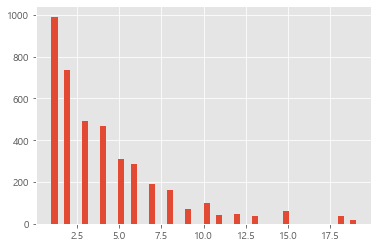

In [55]:
n, bins, patches = plt.hist(x, bins=50)

In [56]:
# 위험도 라벨링

list_x = list(x)
num = pd.Series(x)

Q1 = num.quantile(.5)
Q2 = num.quantile(1)

print("Q1 =",Q1)
print("Q2 =",Q2)

Q1 = 3.0
Q2 = 19.0


In [57]:
danger=[]

# 0단계: 경계, 1단계: 위험
for i in df['사고 발생 수']:
    if i < 3.0:
        danger.append(0)
    else:
        danger.append(1)

[1 1 1 ... 0 0 0]


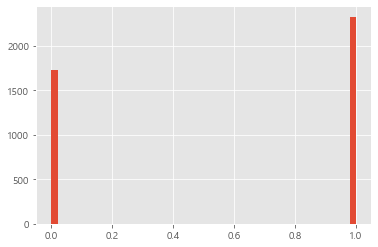

In [58]:
# 사고 발생 수 분포 시각화

x = np.array(danger)
print(x)

series = pd.Series(x)
series.describe()

n, bins, patches=plt.hist(x, bins=50)

In [59]:
df['위험도'] = danger
df.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,사고월,사고일,사고시간,사고시간_인덱싱,사고요일,사고요일_i,사고장소,위도,경도,사고내용,...,가해운전자 성별,가해운전자 성별_i,가해운전자 연령대,피해운전자 차종,피해운전자 차종_i,피해운전자 성별,피해운전자 성별_i,피해운전자 연령대,사고 발생 수,위험도
0,7,4,18,6,목,3,서울특별시 강남구 역삼동 강남대로,37.526732,127.013484,경상,...,남,0,20,승용,1,남,0,60,6,1
1,7,22,11,3,월,0,서울특별시 강남구 역삼동 강남대로,37.526732,127.013484,중상,...,여,1,60,승합,5,남,0,60,6,1
2,9,3,18,6,화,1,서울특별시 강남구 역삼동 강남대로,37.526732,127.013484,경상,...,남,0,30,승합,5,남,0,60,6,1
3,9,5,5,1,목,3,서울특별시 강남구 역삼동 강남대로,37.526732,127.013484,경상,...,남,0,30,승용,1,여,1,60,6,1
4,5,25,15,5,토,5,서울특별시 강남구 역삼동 강남대로,37.526732,127.013484,경상,...,남,0,30,승용,1,남,0,60,6,1


# EDA(위험도 기준)
---

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4050 entries, 0 to 4049
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사고월         4050 non-null   object 
 1   사고일         4050 non-null   object 
 2   사고시간        4050 non-null   int64  
 3   사고시간_인덱싱    4050 non-null   int64  
 4   사고요일        4050 non-null   object 
 5   사고요일_i      4050 non-null   int64  
 6   사고장소        4050 non-null   object 
 7   위도          4050 non-null   float64
 8   경도          4050 non-null   float64
 9   사고내용        4050 non-null   object 
 10  사고내용_i      4050 non-null   int64  
 11  사고유형        4050 non-null   object 
 12  사고유형_i      4050 non-null   int64  
 13  기상상태        4050 non-null   object 
 14  기상상태_i      4050 non-null   int64  
 15  도로형태        4050 non-null   int64  
 16  가해운전자 차종    4050 non-null   object 
 17  가해운전자 차종_i  4050 non-null   int64  
 18  가해운전자 성별    4050 non-null   object 
 19  가해운전자 성별_i  4050 non-null  

In [61]:
data = df[['위도','경도','사고월','사고시간_인덱싱','사고요일_i','사고내용_i','사고유형_i','기상상태_i','도로형태','위험도']]
data

,위도,경도,사고월,사고시간_인덱싱,사고요일_i,사고내용_i,사고유형_i,기상상태_i,도로형태,위험도
0,37.526732,127.013484,7,6,3,1,0,0,1,1
1,37.526732,127.013484,7,3,0,2,0,0,1,1
2,37.526732,127.013484,9,6,1,1,0,0,1,1
3,37.526732,127.013484,9,1,3,1,0,1,1,1
4,37.526732,127.013484,5,5,5,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
4045,37.602453,127.092599,10,6,2,1,1,0,0,0
4046,37.602883,127.076879,8,0,6,0,0,0,1,0
4047,37.613120,127.113445,9,4,0,1,1,0,1,0
4048,37.613120,127.113445,9,7,2,1,0,0,0,0


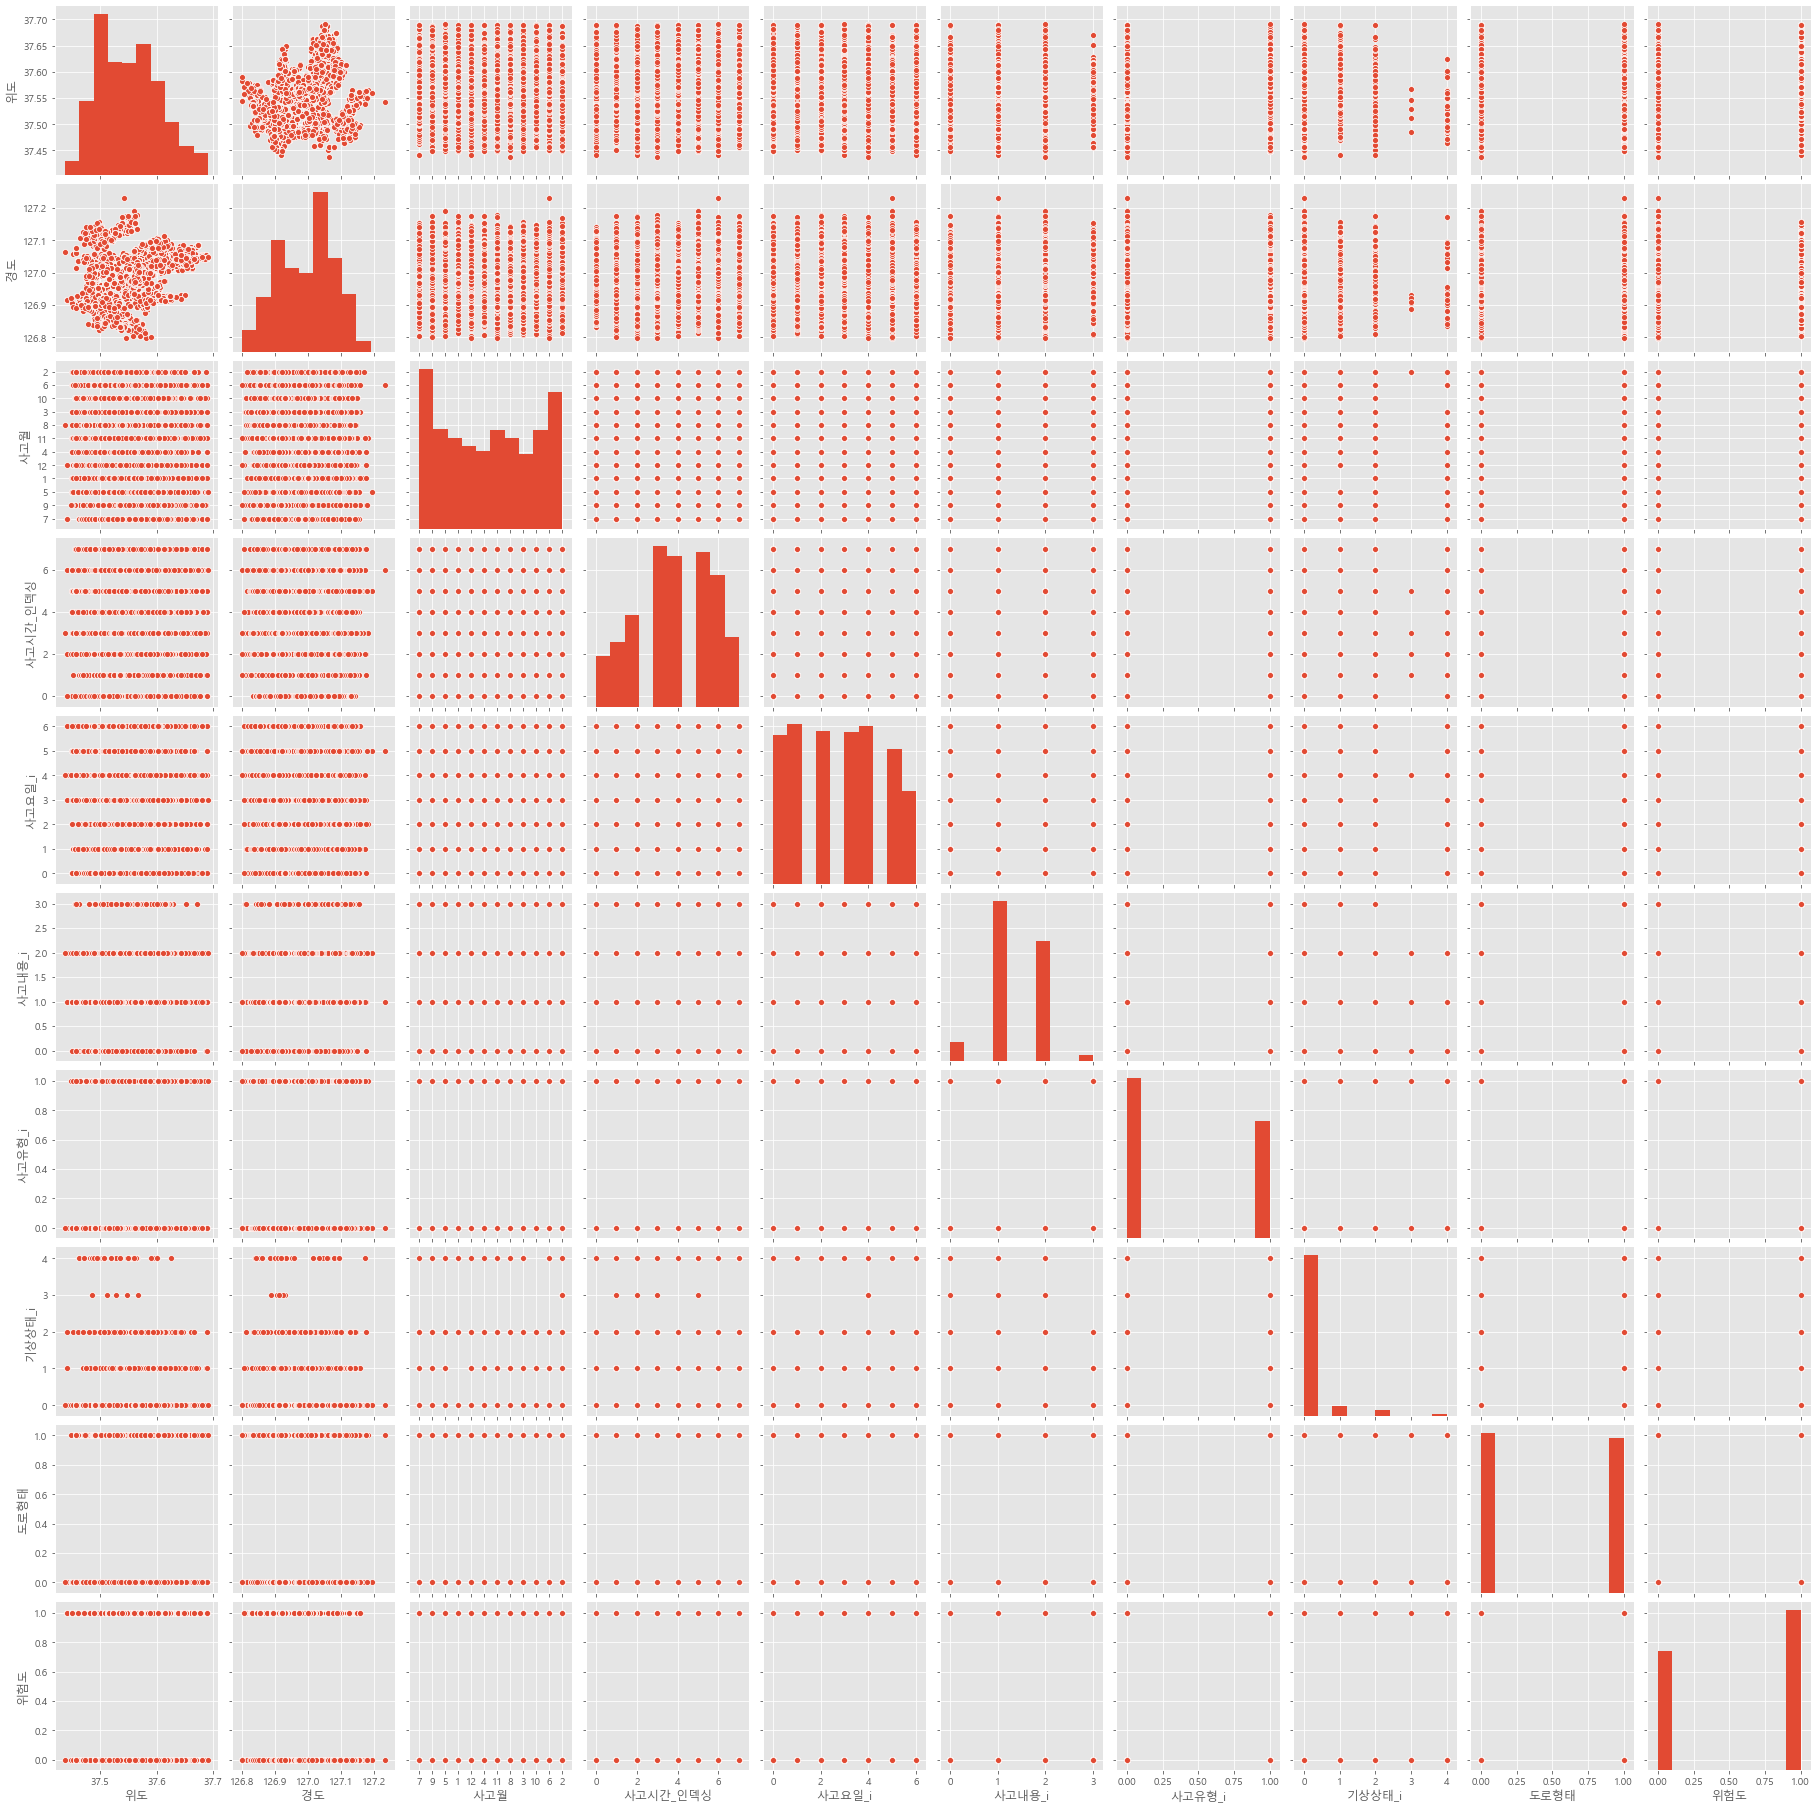

In [62]:
import seaborn as sns

sns.pairplot(data = data)
plt.show()

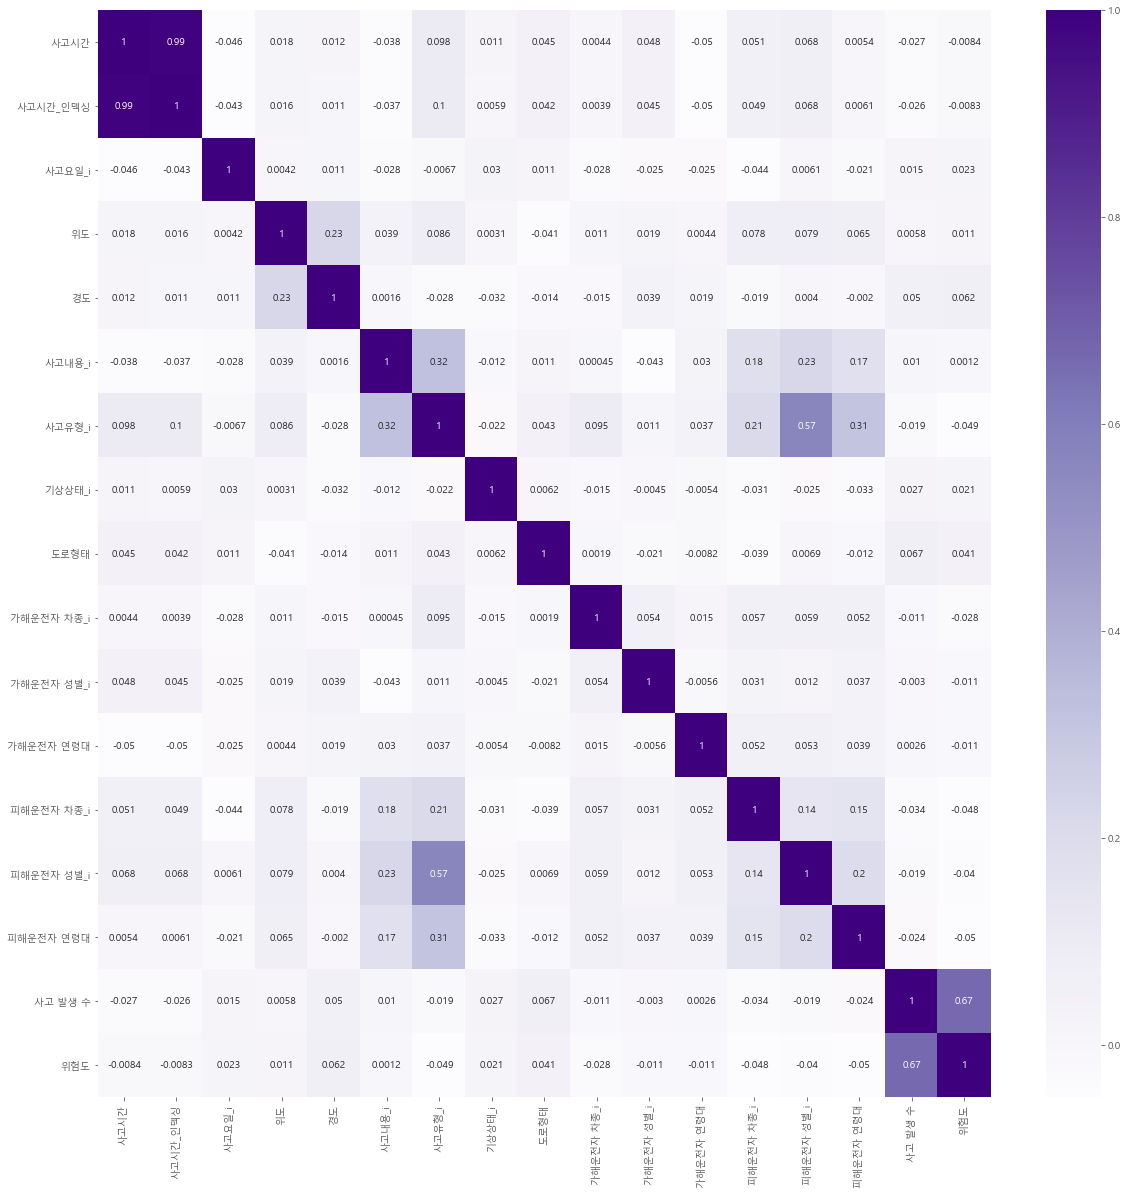

In [63]:
import seaborn as sns

plt.figure(figsize = (20,20))
sns.heatmap(data = df.corr(),annot=True, cmap = 'Purples')
plt.show()

In [64]:
def bar_chart_2(feature):
    danger_1 = df[df['위험도']== 0][feature].value_counts()
    danger_2 = df[df['위험도']== 1][feature].value_counts()
    
    df_2 = pd.DataFrame([danger_1, danger_2])
    df_2.index = ['danger_1','danger_2']
    print(df_2)
    ax = df_2.plot(kind='bar',stacked=True, rot=0, figsize=(8,8))
    
    # 범례 나타내기
    ax.legend(loc='upper right', shadow=True, ncol=1, bbox_to_anchor=(1.15, 1))
    #plt.rc('legend', fontsize=30)
    
    # 보조선(눈금선) 나타내기
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
    for p in ax.patches: 
        left, bottom, width, height = p.get_bbox().bounds 
        ax.annotate("%d"%(height*100), (left+width/2, bottom+height/2), ha='center',va='center',fontsize=6)

    plt.show()

In [65]:
df.columns

Index(['사고월', '사고일', '사고시간', '사고시간_인덱싱', '사고요일', '사고요일_i', '사고장소', '위도', '경도',
       '사고내용', '사고내용_i', '사고유형', '사고유형_i', '기상상태', '기상상태_i', '도로형태',
       '가해운전자 차종', '가해운전자 차종_i', '가해운전자 성별', '가해운전자 성별_i', '가해운전자 연령대',
       '피해운전자 차종', '피해운전자 차종_i', '피해운전자 성별', '피해운전자 성별_i', '피해운전자 연령대',
       '사고 발생 수', '위험도'],
      dtype='object')

            5   11   10    1    8    9   12    6    4    3    7    2
danger_1  175  174  169  160  159  145  141  132  127  123  117  103
danger_2  226  221  228  204  205  184  192  181  183  178  193  130


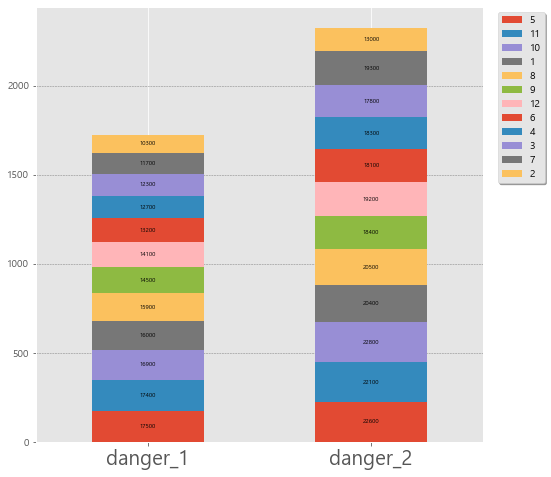

In [66]:
plt.rcParams["font.size"] = 10
plt.rcParams['xtick.labelsize'] = 20.
plt.rcParams['ytick.labelsize'] = 10.

bar_chart_2('사고월')

            경상   중상  부상신고  사망
danger_1   906  680   107  32
danger_2  1218  911   147  49


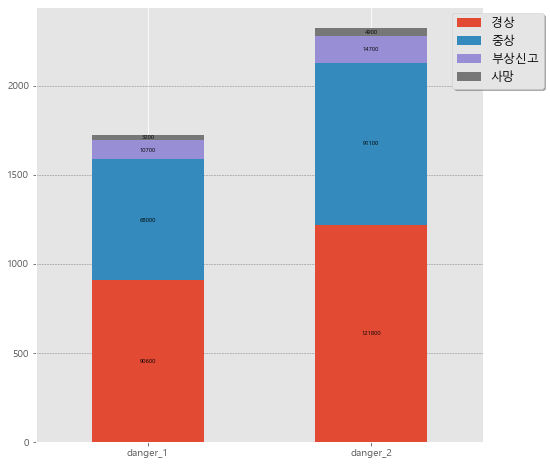

In [67]:
plt.rcParams["figure.figsize"] = (1,1)
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

bar_chart_2('사고내용')

            맑음    비  흐림  기타  눈
danger_1  1575   78  53  15  4
danger_2  2079  138  84  23  1


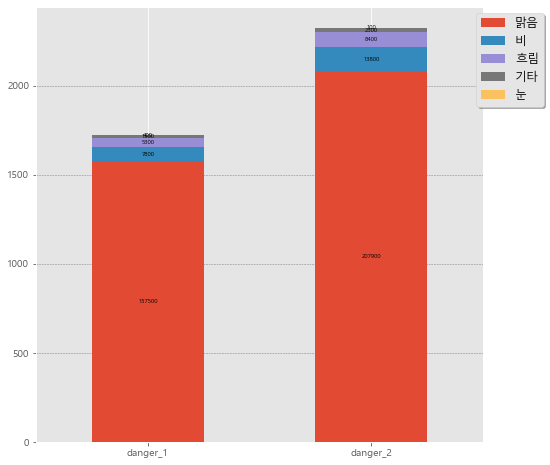

In [68]:
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

bar_chart_2('기상상태')

           차대차  차대사람
danger_1   945   780
danger_2  1388   937


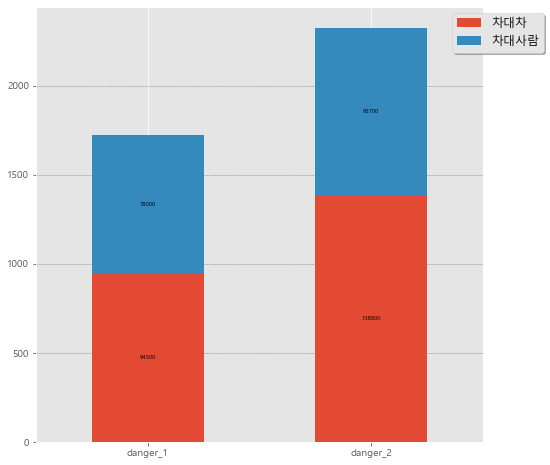

In [69]:
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

bar_chart_2('사고유형')

          0   1   2   3   4   5   6   7   8    9   ...   14   15   16   17  \
danger_1  35  22  16  25  31  66  53  62  82  109  ...  103  129  106   88   
danger_2  62  57  42  33  55  90  72  63  93  115  ...  131  142  128  125   

           18   19  20  21  22  23  
danger_1  103   99  55  56  36  31  
danger_2  141  115  98  84  66  49  

[2 rows x 24 columns]


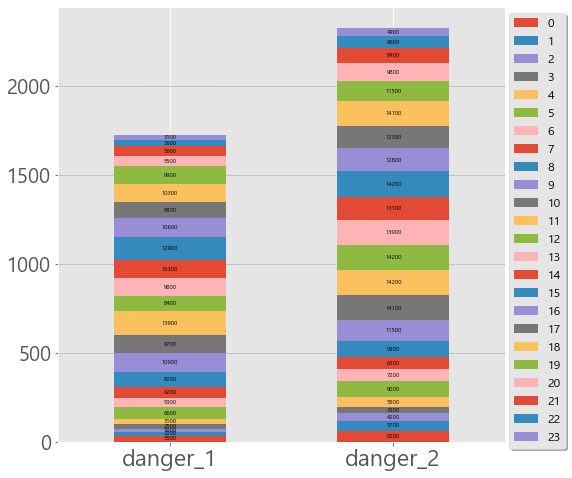

In [70]:
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 20

bar_chart_2('사고시간')

            금    수    목    월    화    토    일
danger_1  281  279  277  274  253  214  147
danger_2  358  339  339  330  397  331  231


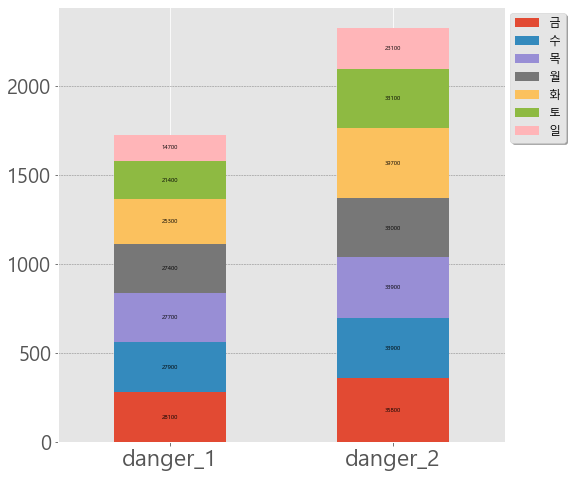

In [71]:
bar_chart_2('사고요일')

          0   1   2   3   4   5   6   7   8    9   ...   14   15   16   17  \
danger_1  35  22  16  25  31  66  53  62  82  109  ...  103  129  106   88   
danger_2  62  57  42  33  55  90  72  63  93  115  ...  131  142  128  125   

           18   19  20  21  22  23  
danger_1  103   99  55  56  36  31  
danger_2  141  115  98  84  66  49  

[2 rows x 24 columns]


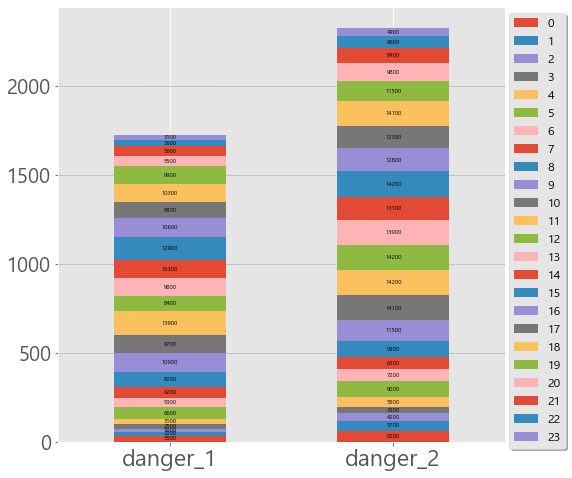

In [72]:
bar_chart_2('사고시간')

            0    1    2    3    4    5    6    7
danger_1   73  122  197  345  285  323  257  123
danger_2  161  178  228  398  412  395  354  199


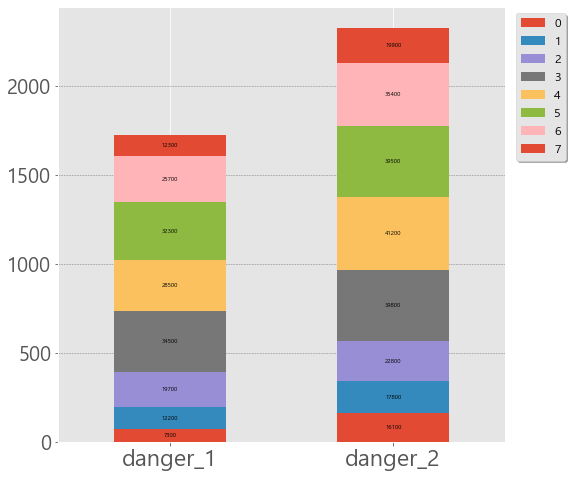

In [73]:
bar_chart_2('사고시간_인덱싱')

             0     1
danger_1   918   807
danger_2  1142  1183


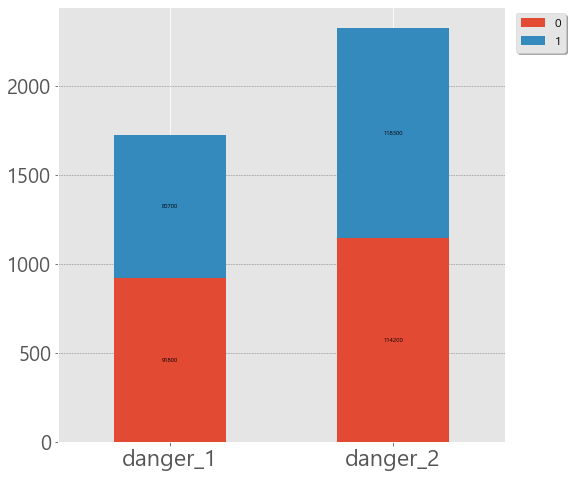

In [74]:
bar_chart_2('도로형태')

            60   70   80  90
danger_1   720  811  180  14
danger_2  1103  983  226  13


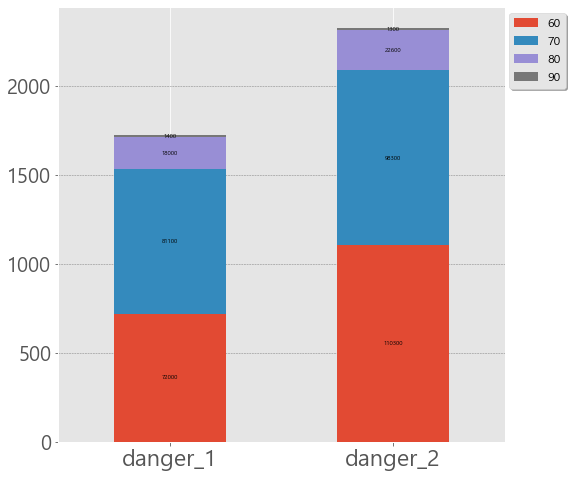

In [75]:
bar_chart_2('피해운전자 연령대')

Text(0.5, 1.0, '피해운전자 연령대별 분포')

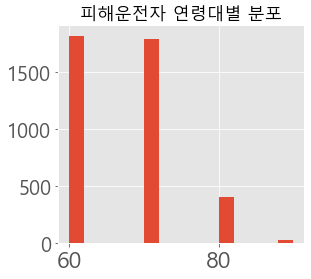

In [76]:
plt.figure(figsize=(15,4))
plt.subplot(133)
df['피해운전자 연령대'].hist(bins=15)
plt.title('피해운전자 연령대별 분포')

Text(0.5, 1.0, '가해운전자 연령대별 분포')

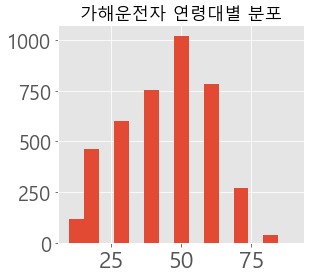

In [77]:
plt.figure(figsize=(15,4))
plt.subplot(133)
df['가해운전자 연령대'].hist(bins=15)
plt.title('가해운전자 연령대별 분포')

# 학습
---

In [78]:
# 독립변수와 종속변수 분리
X = df[['위도','경도','사고시간_인덱싱','사고요일_i','기상상태_i','도로형태']]
Y = df[['위험도']]

In [79]:
X

,위도,경도,사고시간_인덱싱,사고요일_i,기상상태_i,도로형태
0,37.526732,127.013484,6,3,0,1
1,37.526732,127.013484,3,0,0,1
2,37.526732,127.013484,6,1,0,1
3,37.526732,127.013484,1,3,1,1
4,37.526732,127.013484,5,5,0,1
...,...,...,...,...,...,...
4045,37.602453,127.092599,6,2,0,0
4046,37.602883,127.076879,0,6,0,1
4047,37.613120,127.113445,4,0,0,1
4048,37.613120,127.113445,7,2,0,0


In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1234)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2835, 6) (1215, 6) (2835, 1) (1215, 1)


## 1) Decision Tree
---

In [81]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 1234)
dt.fit(X_train, Y_train)

# 정확도 출력
print(dt.score(X_train, Y_train))
print(dt.score(X_test, Y_test))

0.9943562610229277
0.739917695473251


In [82]:
training_accuracy = []
test_accuracy = []

max_depth_settings = range(1, 25)

for k in max_depth_settings:
    # 모델 생성
    dt = DecisionTreeClassifier(max_depth = k, random_state = 0)
    dt.fit(X_train, Y_train)
    # 정확도 출력
    training_accuracy.append(dt.score(X_train, Y_train))
    test_accuracy.append(dt.score(X_test, Y_test))
    print('Max_depth : {}'.format(k))
    print('훈련 세트 정확도 : {:,.3f}'.format(dt.score(X_train, Y_train)))
    print('테스트 세트 정확도 : {:,.3f}'.format(dt.score(X_test, Y_test)))
    print('특성 중요도 : \n', dt.feature_importances_)
    print()

Max_depth : 1
훈련 세트 정확도 : 0.576
테스트 세트 정확도 : 0.569
특성 중요도 : 
 [0. 1. 0. 0. 0. 0.]

Max_depth : 2
훈련 세트 정확도 : 0.585
테스트 세트 정확도 : 0.580
특성 중요도 : 
 [0.78307751 0.21692249 0.         0.         0.         0.        ]

Max_depth : 3
훈련 세트 정확도 : 0.605
테스트 세트 정확도 : 0.603
특성 중요도 : 
 [0.55648654 0.44351346 0.         0.         0.         0.        ]

Max_depth : 4
훈련 세트 정확도 : 0.635
테스트 세트 정확도 : 0.609
특성 중요도 : 
 [0.55618992 0.44381008 0.         0.         0.         0.        ]

Max_depth : 5
훈련 세트 정확도 : 0.656
테스트 세트 정확도 : 0.633
특성 중요도 : 
 [0.47758779 0.52241221 0.         0.         0.         0.        ]

Max_depth : 6
훈련 세트 정확도 : 0.680
테스트 세트 정확도 : 0.635
특성 중요도 : 
 [4.34057585e-01 5.31866466e-01 3.37957065e-02 2.80242476e-04
 0.00000000e+00 0.00000000e+00]

Max_depth : 7
훈련 세트 정확도 : 0.699
테스트 세트 정확도 : 0.654
특성 중요도 : 
 [0.40540542 0.54618779 0.03491365 0.00623066 0.00525316 0.00200932]

Max_depth : 8
훈련 세트 정확도 : 0.732
테스트 세트 정확도 : 0.673
특성 중요도 : 
 [0.41036891 0.52516098 0.04422552 0.01285838

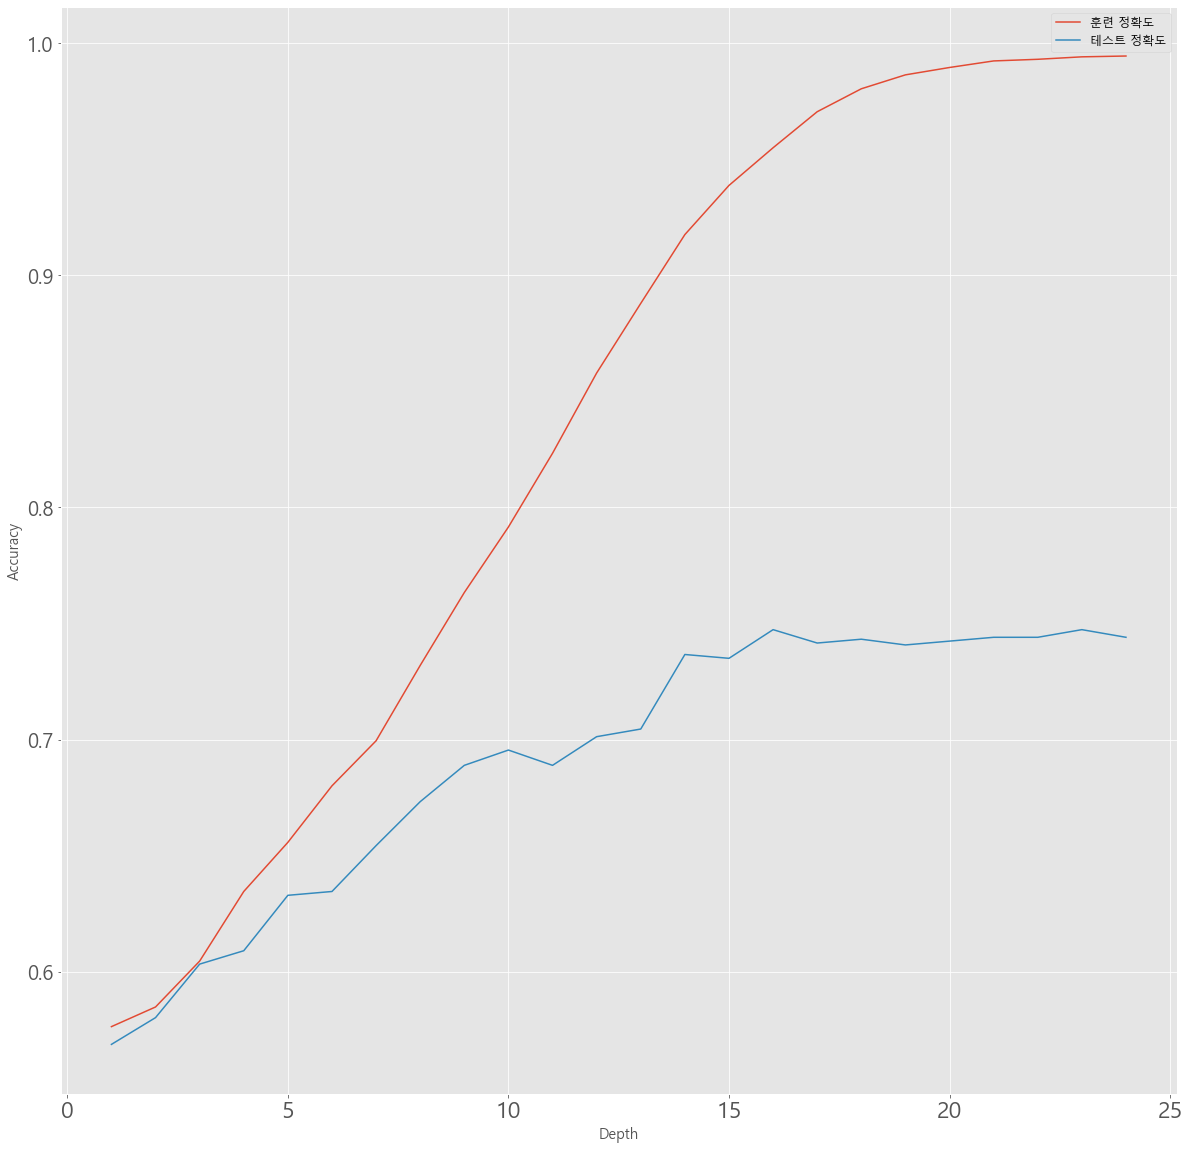

In [83]:
# 깊이 증가에 따른 예측 정확도 성능 비교
plt.figure(figsize = (20, 20))
plt.plot(max_depth_settings, training_accuracy, label = '훈련 정확도')
plt.plot(max_depth_settings, test_accuracy, label = '테스트 정확도')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend()

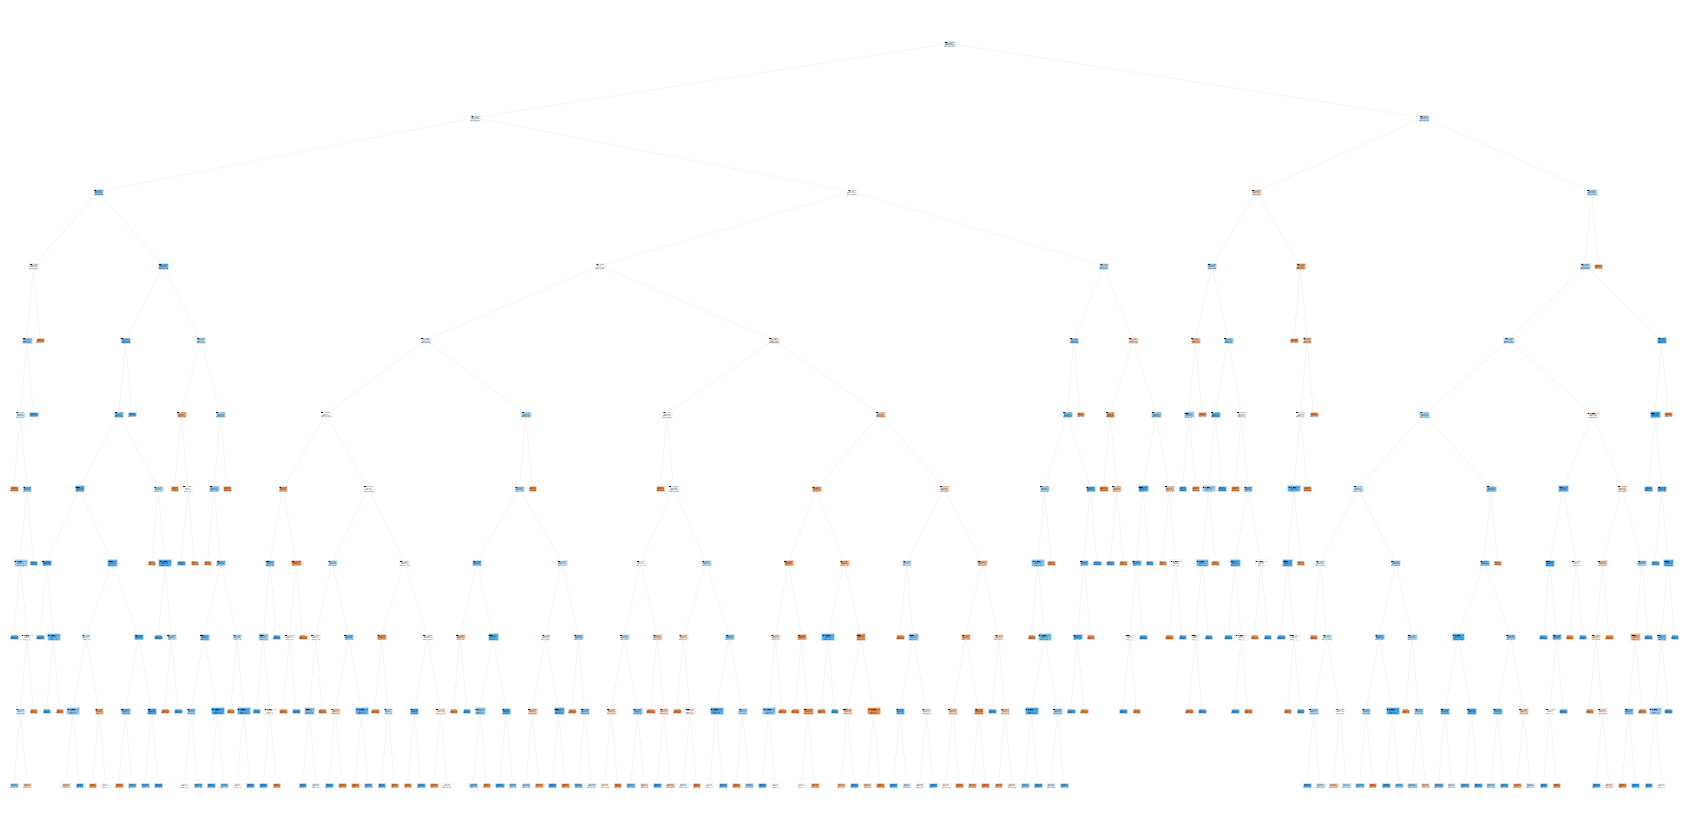

In [84]:
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth = 10, random_state = 1234) #과적합 방지
dt.fit(X_train, Y_train)
plt.figure(figsize = (30, 15))
plot_tree(dt, filled = True, feature_names = ['위도','경도','사고시간_인덱싱','사고요일_i','기상상태_i','도로형태'])
plt.show()

In [85]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [86]:
# Decision Tree Prediction
Y_predict_dt = dt.predict(X_test)

In [87]:
# 오차 행렬(Confusion Matrix)를 통해 최적의 K에서의 예측 성능 확인
confusion_matrix(Y_test, Y_predict_dt)

array([[284, 240],
       [128, 563]], dtype=int64)

In [88]:
# Decision Tree Prediction
Y_predict_dt = dt.predict(X_test)

## 2) KNN Regression
---

In [89]:
import sklearn.preprocessing as preprocessing
from sklearn.neighbors import KNeighborsRegressor

In [90]:
# 변수 값 정규화
preprocessor = preprocessing.Normalizer()
X_train_kr = preprocessor.fit_transform(X_train)
X_test_kr = preprocessor.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


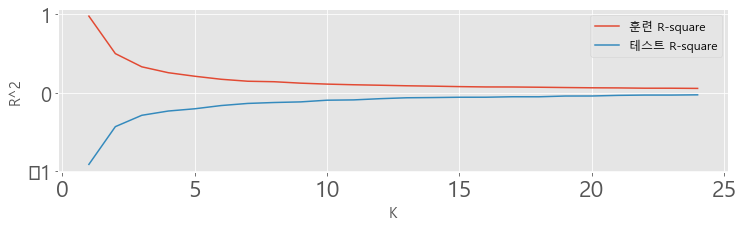

In [91]:
training_rsquare = []
test_rsquare = []

# 여러 k 값에 대한 모델 생성 n_neighbors를 적용
k_settings = range(1, 25)

for k in k_settings:
    # 모델 생성
    corolla_knn = KNeighborsRegressor(n_neighbors = k)
    corolla_knn.fit(X_train_kr, Y_train)
    # 훈련 세트 정확도 저장
    training_rsquare.append(corolla_knn.score(X_train, Y_train))
    # 일반화 정확도 저장
    test_rsquare.append(corolla_knn.score(X_test_kr, Y_test))
    
# K의 변화량에 따른 예측 정확도 성능 비교
plt.figure(figsize=(12, 3))
plt.plot(k_settings, training_rsquare, label = "훈련 R-square")
plt.plot(k_settings, test_rsquare, label = "테스트 R-square")
plt.ylabel('R^2')
plt.xlabel('K')
plt.legend()

In [92]:
# 최적의 K 판단
from itertools import compress
best_k_temp = test_rsquare == max(test_rsquare)
best_k = list(compress(k_settings, best_k_temp))[0]
print('최적의 K 값:', best_k)

최적의 K 값: 24


In [93]:
best_k = 10 # 과적합 방지

# 최적의 K 값에서 테스트 데이터의 Y 예측값
best_corolla_knn = KNeighborsRegressor(n_neighbors = best_k)
best_corolla_knn.fit(X_train_kr, Y_train)
Y_predict_kr = best_corolla_knn.predict(X_test_kr)
print(Y_predict_kr)

[[0.7]
 [0.4]
 [0.6]
 ...
 [0.8]
 [0.6]
 [0.8]]


In [94]:
def cut_off(y, threshold):
    Y = y.copy() # copy 함수를 사용하여 이전의 y 값이 변화하지 않게 함
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return (Y.astype(int))

In [95]:
Y_predict_kr = cut_off(Y_predict_kr, 0.5)

## 3) Logistic Regression
---

In [96]:
import statsmodels.api as sm

In [97]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 1234, stratify = Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2835, 6) (1215, 6) (2835, 1) (1215, 1)


In [98]:
# 로지스틱 회귀 모형 생성
logit_m = sm.Logit(Y_train, X_train)
logit_m_train = logit_m.fit(method = 'powell')

Optimization terminated successfully.
         Current function value: 0.681282
         Iterations: 3
         Function evaluations: 216


In [99]:
logit_m_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    위험도   No. Observations:                 2835
Model:                          Logit   Df Residuals:                     2829
Method:                           MLE   Df Model:                            5
Date:                Thu, 25 Nov 2021   Pseudo R-squ.:                0.001325
Time:                        11:36:26   Log-Likelihood:                -1931.4
converged:                       True   LL-Null:                       -1934.0
Covariance Type:            nonrobust   LLR p-value:                    0.4009
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
위도             0.0044      0.705      0.006      0.995      -1.378       1.387
경도          6.086e-06      0.209   2.92e-05      1.000      -0.409       0.409
사고시간_인덱싱       0.0023      0.020      0.113      0.910      -0.037       0.042
사고요일_i         0.0168      0.020      0.838      0.402      -0.022       0.056
기상상태_i         0.0711      0.068      1.046      0.295      -0.062       0.204
도로형태           0.1365      0.076      1.789      0.074      -0.013       0.286
==============================================================================
"""

In [100]:
# Logistic Regression
Y_predict_logit = logit_m_train.predict(X_test)

In [101]:
# Y_predict를 threshold를 기준으로 0과 1로 나누어주는 함수 생성
def cut_off(y, threshold):
    Y = y.copy() # copy 함수를 사용하여 이전의 y 값이 변화하지 않게 함
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return (Y.astype(int))

In [102]:
Y_predict_logit = cut_off(Y_predict_logit, 0.5)

In [103]:
confusion_matrix(Y_test, Y_predict_logit)

array([[  0, 517],
       [  0, 698]], dtype=int64)

In [104]:
# result: logistic regression
accuracy = accuracy_score(Y_test, Y_predict_logit)
precision = precision_score(Y_test, Y_predict_logit)
recall = recall_score(Y_test, Y_predict_logit)
f1 = f1_score(Y_test, Y_predict_logit)
print('Accuracy : {0:.3f}'.format(accuracy))
print('Precision : {0:.3f}'.format(precision))
print('Recall : {0:.3f}'.format(recall))
print('F1 : {0:.3f}'.format(f1))

Accuracy : 0.574
Precision : 0.574
Recall : 1.000
F1 : 0.730


In [105]:
# result: decision tree
accuracy = accuracy_score(Y_test, Y_predict_dt)
precision = precision_score(Y_test, Y_predict_dt)
recall = recall_score(Y_test, Y_predict_dt)
f1 = f1_score(Y_test, Y_predict_dt)
print('Accuracy : {0:.3f}'.format(accuracy))
print('Precision : {0:.3f}'.format(precision))
print('Recall : {0:.3f}'.format(recall))
print('F1 : {0:.3f}'.format(f1))

Accuracy : 0.543
Precision : 0.589
Recall : 0.678
F1 : 0.630


In [106]:
# result: knn
accuracy = accuracy_score(Y_test, Y_predict_kr)
precision = precision_score(Y_test, Y_predict_kr)
recall = recall_score(Y_test, Y_predict_kr)
f1 = f1_score(Y_test, Y_predict_kr)
print('Accuracy : {0:.3f}'.format(accuracy))
print('Precision : {0:.3f}'.format(precision))
print('Recall : {0:.3f}'.format(recall))
print('F1 : {0:.3f}'.format(f1))

Accuracy : 0.542
Precision : 0.604
Recall : 0.590
F1 : 0.597


## 랜덤 테스트셋
---

In [107]:
# Taas 노인보호구역
care_zone = pd.read_csv('C:/Users/s/Desktop/mlproject/전국노인장애인보호구역표준데이터.csv', engine = 'python')
care_zone.head()

,장소유형코드,대상시설명,시도명,시군구명,시군구코드,소재지도로명주소,소재지지번주소,위도,경도,제한속도,관리기관명,관리기관전화번호,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
0,1,금일읍경로조합복지회관,전라남도,완도군,49900,전남 완도군 금일읍 금일로 381,전라남도 완도군 금일읍 화목리 973 감목리새마을회,34.349535,127.028428,30,전라남도 완도군청,061-550-5773,완도경찰서,N,NaN,NaN,2020-09-02,4990000,전라남도 완도군
1,1,월평동 경로당,제주특별자치도,제주시,50110,제주특별자치도 제주시 월평5길 2,제주특별자치도 제주시 월평동 1039-1,33.470052,126.575382,30,자치경찰단,064-710-6413,제주동부경찰서,N,NaN,NaN,2021-10-01,6500000,제주특별자치도
2,1,위미리 자미성,제주특별자치도,서귀포시,50130,제주특별자치도 서귀포시 남원읍 자배오름로139번길 157,제주특별자치도 서귀포시 남원읍 위미리 2506,33.291249,126.661783,30,자치경찰단,064-710-6413,서귀포경찰서,N,NaN,NaN,2021-10-01,6500000,제주특별자치도
3,1,은빛마을노인복지센터,제주특별자치도,제주시,50110,제주특별자치도 제주시 조천읍 함덕20길 42,제주특별자치도 제주시 조천읍 함덕리 919-3,33.538248,126.666922,30,자치경찰단,064-710-6413,제주동부경찰서,N,NaN,NaN,2021-10-01,6500000,제주특별자치도
4,2,자광원,제주특별자치도,서귀포시,50130,제주특별자치도 서귀포시 이어도로343번길 101,제주특별자치도 서귀포시 대포동 1146-1,33.247518,126.448469,30,자치경찰단,064-710-6413,서귀포경찰서,N,NaN,NaN,2021-10-01,6500000,제주특별자치도


In [108]:
# 서울특별시의 노인보호구역 데이터 추출, 장소 유형 코드가 1이어야 함(2는 장애인보호구역)

care_zone = care_zone[care_zone['시도명'] == '서울특별시']
care_zone = care_zone[care_zone['장소유형코드'] == 1]

care_zone.head()

,장소유형코드,대상시설명,시도명,시군구명,시군구코드,소재지도로명주소,소재지지번주소,위도,경도,제한속도,관리기관명,관리기관전화번호,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
137,1,관악노인복지관,서울특별시,관악구,11620,서울특별시 관악구 봉천동 보라매로 35 관악노인종합복지관,서울특별시 관악구 봉천동 726-3,37.493042,126.926301,30,서울특별시 관악구청,02-879-6862,서울관악경찰서,N,0.0,6~25,2021-09-24,3200000,서울특별시 관악구
138,1,동명노인복지관,서울특별시,관악구,11620,서울특별시 관악구 봉천로23라길 15,서울특별시 관악구 봉천동 647-10,37.488442,126.937231,30,서울특별시 관악구청,02-879-6862,서울관악경찰서,Y,2.0,6,2021-09-24,3200000,서울특별시 관악구
139,1,덕진경로당,서울특별시,관악구,11620,서울특별시 관악구 봉천동 남부순환로234길 37 덕진경로당,서울특별시 관악구 봉천동 1621-23,37.477696,126.956795,30,서울특별시 관악구청,02-879-6862,서울관악경찰서,Y,1.0,6,2021-09-24,3200000,서울특별시 관악구
140,1,백설경로당,서울특별시,관악구,11620,서울특별시 관악구 봉천동 관악로6길 50 백설경로당,서울특별시 관악구 봉천동 1606-11,37.476237,126.953512,30,서울특별시 관악구청,02-879-6862,서울관악경찰서,Y,1.0,6,2021-09-24,3200000,서울특별시 관악구
141,1,관악시니어클럽,서울특별시,관악구,11620,서울특별시 관악구 봉천동 남부순환로247다길 60 원당경로당,서울특별시 관악구 봉천동 148-145,37.478627,126.964194,30,서울특별시 관악구청,02-879-6862,서울관악경찰서,Y,1.0,6,2021-09-24,3200000,서울특별시 관악구


In [109]:
# 필요한 좌표 데이터만 추출
care_zone = care_zone[['위도', '경도']]
care_zone = care_zone.loc[::-1].reset_index(drop = True)
care_zone.head()

,위도,경도
0,37.614874,127.087842
1,37.588497,127.077843
2,37.604393,127.107680
3,37.621720,127.078956
4,37.643445,127.073337


In [110]:
care_zone.shape

(136, 2)

In [111]:
# '위도','경도','사고시간_인덱싱','사고요일_i','기상상태_i','도로형태','위험도'
# 위도와 경도를 제외한 X: '사고시간_인덱싱','사고요일_i','기상상태_i','도로형태'
# 랜덤으로 생성
import random

length = 136
time = []

for i in range(0, length):
    time.append(int(random.uniform(0,8)))

date = []
for i in range(0, length):
    date.append(int(random.uniform(0, 7)))


weather = []
for i in range(0, length):
    weather.append(int(random.uniform(0, 5)))

    
road = []
for i in range(0, length):
    road.append(int(random.uniform(0,2)))
    
random.shuffle(time)
random.shuffle(date)
random.shuffle(weather)
random.shuffle(road)

In [112]:
care_zone['사고시간_인덱싱'] = time
care_zone['사고요일_i'] = date
care_zone['기상상태_i'] = weather
care_zone['도로형태'] = road

print(care_zone.head(5))
care_zone.to_csv('C:/Users/s/Desktop/mlproject/Random-test.csv',encoding='utf-8-sig')
print(care_zone.shape[0])

          위도          경도  사고시간_인덱싱  사고요일_i  기상상태_i  도로형태
0  37.614874  127.087842         3       5       4     0
1  37.588497  127.077843         0       6       4     1
2  37.604393  127.107680         1       2       4     0
3  37.621720  127.078956         7       6       0     0
4  37.643445  127.073337         7       6       2     1
136


In [113]:
test = pd.read_csv('C:/Users/s/Desktop/mlproject/Random-test.csv')
test = pd.DataFrame(test.iloc[:,1:])
test.head()

,위도,경도,사고시간_인덱싱,사고요일_i,기상상태_i,도로형태
0,37.614874,127.087842,3,5,4,0
1,37.588497,127.077843,0,6,4,1
2,37.604393,127.107680,1,2,4,0
3,37.621720,127.078956,7,6,0,0
4,37.643445,127.073337,7,6,2,1


In [114]:
X = test[['위도','경도','사고시간_인덱싱','사고요일_i','기상상태_i','도로형태']]

In [115]:
test_dt = DecisionTreeClassifier(random_state = 1234)
test_dt.fit(X_train, Y_train)
prediction = test_dt.predict(test)
print(prediction)

[0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0
 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0
 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0]


In [116]:
test['위험도'] = prediction
test

,위도,경도,사고시간_인덱싱,사고요일_i,기상상태_i,도로형태,위험도
0,37.614874,127.087842,3,5,4,0,0
1,37.588497,127.077843,0,6,4,1,0
2,37.604393,127.107680,1,2,4,0,0
3,37.621720,127.078956,7,6,0,0,1
4,37.643445,127.073337,7,6,2,1,0
...,...,...,...,...,...,...,...
131,37.478627,126.964194,3,4,1,1,0
132,37.476237,126.953512,5,6,1,0,0
133,37.477696,126.956795,7,6,2,0,0
134,37.488442,126.937231,7,0,1,0,1


In [117]:
care_zone_ver2 = pd.read_csv('C:/Users/s/Desktop/mlproject/전국노인장애인보호구역표준데이터.csv', engine = 'python')
care_zone_ver2.head()

,장소유형코드,대상시설명,시도명,시군구명,시군구코드,소재지도로명주소,소재지지번주소,위도,경도,제한속도,관리기관명,관리기관전화번호,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
0,1,금일읍경로조합복지회관,전라남도,완도군,49900,전남 완도군 금일읍 금일로 381,전라남도 완도군 금일읍 화목리 973 감목리새마을회,34.349535,127.028428,30,전라남도 완도군청,061-550-5773,완도경찰서,N,NaN,NaN,2020-09-02,4990000,전라남도 완도군
1,1,월평동 경로당,제주특별자치도,제주시,50110,제주특별자치도 제주시 월평5길 2,제주특별자치도 제주시 월평동 1039-1,33.470052,126.575382,30,자치경찰단,064-710-6413,제주동부경찰서,N,NaN,NaN,2021-10-01,6500000,제주특별자치도
2,1,위미리 자미성,제주특별자치도,서귀포시,50130,제주특별자치도 서귀포시 남원읍 자배오름로139번길 157,제주특별자치도 서귀포시 남원읍 위미리 2506,33.291249,126.661783,30,자치경찰단,064-710-6413,서귀포경찰서,N,NaN,NaN,2021-10-01,6500000,제주특별자치도
3,1,은빛마을노인복지센터,제주특별자치도,제주시,50110,제주특별자치도 제주시 조천읍 함덕20길 42,제주특별자치도 제주시 조천읍 함덕리 919-3,33.538248,126.666922,30,자치경찰단,064-710-6413,제주동부경찰서,N,NaN,NaN,2021-10-01,6500000,제주특별자치도
4,2,자광원,제주특별자치도,서귀포시,50130,제주특별자치도 서귀포시 이어도로343번길 101,제주특별자치도 서귀포시 대포동 1146-1,33.247518,126.448469,30,자치경찰단,064-710-6413,서귀포경찰서,N,NaN,NaN,2021-10-01,6500000,제주특별자치도


In [118]:
# 서울특별시의 노인보호구역 데이터 추출, 장소 유형 코드가 1이어야 함(2는 장애인보호구역)

care_zone_ver2 = care_zone_ver2[care_zone_ver2['시도명'] == '서울특별시']
care_zone_ver2 = care_zone_ver2[care_zone_ver2['장소유형코드'] == 1]
care_zone_ver2 = care_zone_ver2.loc[::-1].reset_index(drop = True)

care_zone_ver2.head()

,장소유형코드,대상시설명,시도명,시군구명,시군구코드,소재지도로명주소,소재지지번주소,위도,경도,제한속도,관리기관명,관리기관전화번호,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,제공기관코드,제공기관명
0,1,신내노인종합복지관,서울특별시,중랑구,11260,서울특별시 중랑구 신내로15길 175,서울특별시 중랑구 신내동 771-1,37.614874,127.087842,30,서울특별시 중랑구청,02-2094-2585,중랑경찰서,Y,3.0,NaN,2021-09-28,3060000,서울특별시 중랑구
1,1,중랑노인종합복지관,서울특별시,중랑구,11260,서울특별시 중랑구 겸재로9길 45,서울특별시 중랑구 면목동 178-8,37.588497,127.077843,30,서울특별시 중랑구청,02-2094-2585,중랑경찰서,Y,3.0,NaN,2021-09-28,3060000,서울특별시 중랑구
2,1,중랑노인전문요양원,서울특별시,중랑구,11260,서울특별시 중랑구 양원역로 38,서울특별시 중랑구 망우동 227,37.604393,127.107680,30,서울특별시 중랑구청,02-2094-2585,중랑경찰서,Y,3.0,NaN,2021-09-28,3060000,서울특별시 중랑구
3,1,공릉어르신복지센터,서울특별시,노원구,11350,서울특별시 노원구 공릉로 129,서울특별시 노원구 공릉동 334-6,37.621720,127.078956,30,노원구청,02-2116-4105,노원경찰서,N,NaN,21,2021-09-15,3100000,서울특별시 노원구
4,1,시립노원노인종합복지관,서울특별시,노원구,11350,서울특별시 노원구 노원로16길 15,서울특별시 노원구 하계동 256,37.643445,127.073337,50,노원구청,02-2116-4105,노원경찰서,N,NaN,9,2021-09-15,3100000,서울특별시 노원구


In [119]:
care_zone_ver2 = care_zone_ver2[['대상시설명', '소재지도로명주소', '위도', '경도']]
care_zone_ver2.head()

,대상시설명,소재지도로명주소,위도,경도
0,신내노인종합복지관,서울특별시 중랑구 신내로15길 175,37.614874,127.087842
1,중랑노인종합복지관,서울특별시 중랑구 겸재로9길 45,37.588497,127.077843
2,중랑노인전문요양원,서울특별시 중랑구 양원역로 38,37.604393,127.107680
3,공릉어르신복지센터,서울특별시 노원구 공릉로 129,37.621720,127.078956
4,시립노원노인종합복지관,서울특별시 노원구 노원로16길 15,37.643445,127.073337


In [120]:
care_zone = pd.merge(test, care_zone_ver2, on = '위도')
del care_zone['경도_x']

In [121]:
care_zone

,위도,사고시간_인덱싱,사고요일_i,기상상태_i,도로형태,위험도,대상시설명,소재지도로명주소,경도_y
0,37.614874,3,5,4,0,0,신내노인종합복지관,서울특별시 중랑구 신내로15길 175,127.087842
1,37.588497,0,6,4,1,0,중랑노인종합복지관,서울특별시 중랑구 겸재로9길 45,127.077843
2,37.604393,1,2,4,0,0,중랑노인전문요양원,서울특별시 중랑구 양원역로 38,127.107680
3,37.643445,7,6,2,1,0,시립노원노인종합복지관,서울특별시 노원구 노원로16길 15,127.073337
4,37.643562,2,1,2,0,0,시립중계노인전문요양원,서울특별시 노원구 섬밭로 313,127.061589
...,...,...,...,...,...,...,...,...,...
117,37.473014,6,0,4,0,0,관악구민종합체육센터,서울특별시 관악구 봉천동 낙성대로3길 37 관악구민종합체육센터,126.960306
118,37.478627,3,4,1,1,0,관악시니어클럽,서울특별시 관악구 봉천동 남부순환로247다길 60 원당경로당,126.964194
119,37.476237,5,6,1,0,0,백설경로당,서울특별시 관악구 봉천동 관악로6길 50 백설경로당,126.953512
120,37.477696,7,6,2,0,0,덕진경로당,서울특별시 관악구 봉천동 남부순환로234길 37 덕진경로당,126.956795


In [122]:
danger_1 = care_zone[care_zone['위험도'] == 0]
danger_1.head()

,위도,사고시간_인덱싱,사고요일_i,기상상태_i,도로형태,위험도,대상시설명,소재지도로명주소,경도_y
0,37.614874,3,5,4,0,0,신내노인종합복지관,서울특별시 중랑구 신내로15길 175,127.087842
1,37.588497,0,6,4,1,0,중랑노인종합복지관,서울특별시 중랑구 겸재로9길 45,127.077843
2,37.604393,1,2,4,0,0,중랑노인전문요양원,서울특별시 중랑구 양원역로 38,127.107680
3,37.643445,7,6,2,1,0,시립노원노인종합복지관,서울특별시 노원구 노원로16길 15,127.073337
4,37.643562,2,1,2,0,0,시립중계노인전문요양원,서울특별시 노원구 섬밭로 313,127.061589


In [123]:
danger_2 = care_zone[care_zone['위험도'] == 1]
danger_2.head()

,위도,사고시간_인덱싱,사고요일_i,기상상태_i,도로형태,위험도,대상시설명,소재지도로명주소,경도_y
5,37.633195,6,3,3,0,1,하계실버센터,서울특별시 노원구 한글비석로 4,127.064191
6,37.534794,0,2,4,0,1,원효로경로당,서울특별시 용산구 원효로41가길 14-19,126.956553
7,37.544723,5,5,4,1,1,효창공원,서울특별시 용산구 임정로 177-18,126.943709
9,37.537880,2,2,4,0,1,송학당경로당,서울특별시 용산구 효창원로37라길 11,126.958154
10,37.482811,2,2,0,1,1,서초느티나무쉼터,서울특별시 서초구 반포대로 1길 53-3,127.010835


## 노인보호구역 시각화
---

In [124]:
import folium

In [125]:
latitude = care_zone['위도']
longitude = care_zone['경도_y']

In [126]:
# 지도를 보여줄 때 메인이 되는 위치
main_location = (37.5502, 126.982)
map_seoul = folium.Map(location=main_location, zoom_start=10.5)

In [127]:
map_seoul

In [128]:
import os

for x in range(len(danger_1)):
    folium.Circle(
        location = (latitude[x],longitude[x]),
        radius = 150,
        color = 'green',
        fill = 'crimson'
    ).add_to(map_seoul)
    
for x in range(len(danger_2)):
    folium.Circle(
        location = (latitude[x],longitude[x]),
        radius = 150,
        color = 'red',
        fill = 'crimson'
    ).add_to(map_seoul)

In [129]:
map_seoul

## 노인사고 다발지역이랑 비교
---

In [130]:
old = pd.read_csv('C:/Users/s/Desktop/mlproject/노인사고다발지역.csv',encoding='cp949')
old.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,145935,2013098,1111018000,11110001,서울특별시 종로구1,서울특별시 종로구 교북동(독립문_의주로_진출_1 부근),3,3,0,3,0,0,126.960630,37.571937,"{""type"":""Polygon"",""coordinates"":[[[126.9622309..."
1,144334,2013098,1111016700,11110002,서울특별시 종로구2,서울특별시 종로구 충신동(이화사거리 부근),5,5,0,5,0,0,127.004402,37.576104,"{""type"":""Polygon"",""coordinates"":[[[127.0060035..."
2,151689,2013098,1111015400,11110003,서울특별시 종로구3,서울특별시 종로구 장사동(종묘공원 부근),6,6,0,4,1,1,126.993647,37.570706,"{""type"":""Polygon"",""coordinates"":[[[126.9952475..."
3,151688,2013098,1111017400,11110004,서울특별시 종로구4,서울특별시 종로구 창신동(동묘앞역_다산로_진입 부근),6,6,1,5,0,0,127.016856,37.572359,"{""type"":""Polygon"",""coordinates"":[[[127.0184565..."
4,144645,2013098,1114016000,11140001,서울특별시 중구1,서울특별시 중구 인현동1가(대림상가앞 부근),3,3,0,1,2,0,126.995342,37.566380,"{""type"":""Polygon"",""coordinates"":[[[126.9969423..."


In [131]:
old = old[['경도', '위도', '발생건수']]
old.head()

,경도,위도,발생건수
0,126.960630,37.571937,3
1,127.004402,37.576104,5
2,126.993647,37.570706,6
3,127.016856,37.572359,6
4,126.995342,37.566380,3


In [133]:
accident_map = folium.Map(location = [37.5502, 126.982], zoom_start = 10.5)
accident_map

In [146]:
latitude = old['위도']
longitude = old['경도']

In [135]:
for x in range(len(old)):
    folium.Circle(
        location = (latitude[x],longitude[x]),
        radius = 150,
        color = 'gray',
        fill = 'crimson'
    ).add_to(accident_map)

In [136]:
accident_map

In [137]:
for x in range(len(old)):
    folium.Circle(
        location = (latitude[x],longitude[x]),
        radius = 150,
        color = 'gray',
        fill = 'crimson'
    ).add_to(map_seoul)

In [138]:
map_seoul

## 지역 분석: 동대문구
---

In [139]:
Dongdaemun_map = folium.Map(location = [37.58,127.06], zoom_start = 13)
Dongdaemun_map

In [147]:
care_zone_latitude = care_zone['위도']
care_zone_longitude = care_zone['경도_y']

In [148]:
for x in range(len(danger_1)):
    folium.Circle(
        location = (care_zone_latitude[x],care_zone_longitude[x]),
        radius = 150,
        color = 'green',
        fill = 'crimson'
    ).add_to(Dongdaemun_map)
    
for x in range(len(danger_2)):
    folium.Circle(
        location = (care_zone_latitude[x],care_zone_longitude[x]),
        radius = 150,
        color = 'red',
        fill = 'crimson'
    ).add_to(Dongdaemun_map)
    
for x in range(len(old)):
    folium.Circle(
        location = (latitude[x],longitude[x]),
        radius = 150,
        color = 'gray',
        fill = 'crimson'
    ).add_to(Dongdaemun_map)

In [149]:
Dongdaemun_map

In [150]:
# 기존 전처리한 전통시장 데이터와 비교
# 전통시장 excel 파일에서 동대문구만 임의로 필터링

market = pd.read_excel('C:/Users/s/Desktop/mlproject/market_ddm.xlsx')
market.head()

,Unnamed: 0,콘텐츠명,구명,지번주소,X,Y
0,329,동대문 청량리 농수산물 시장,동대문구,동대문구 제기동 629-2,127.040876,37.580925
1,330,청량리 종합도매시장,동대문구,동대문구 제기동 838,127.040116,37.582786
2,331,회기시장,동대문구,동대문구 회기동 57-22,127.054964,37.590953
3,332,답십리시장,동대문구,동대문구 답십리동 66-38,127.058050,37.573275
4,333,청량리수산시장,동대문구,동대문구 용두동 20-47,127.041128,37.578069


In [151]:
market = market[['콘텐츠명', '지번주소', 'X', 'Y']]
market.head()

,콘텐츠명,지번주소,X,Y
0,동대문 청량리 농수산물 시장,동대문구 제기동 629-2,127.040876,37.580925
1,청량리 종합도매시장,동대문구 제기동 838,127.040116,37.582786
2,회기시장,동대문구 회기동 57-22,127.054964,37.590953
3,답십리시장,동대문구 답십리동 66-38,127.058050,37.573275
4,청량리수산시장,동대문구 용두동 20-47,127.041128,37.578069


In [156]:
market_longitude = market['X']
market_latitude = market['Y']
market_name = market['콘텐츠명']

In [157]:
for x in range(len(market)):
    folium.Marker(
        location = (market_latitude[x],market_longitude[x]),
        popup = market_name[x],
        icon=folium.Icon(color='blue',icon='star'),
        fill = 'crimson'
    ).add_to(Dongdaemun_map)

In [158]:
Dongdaemun_map